In [8]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('../PredSNPeffects.csv')

In [16]:
df2 = df.loc[:, ['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Shoot_length',
                 'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
                'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Chlorophyll_A', 'Stress_Chlorophyll_B',
                'Seed_Weight', 'SES']]

In [17]:
df2.columns = ['Accession name', 'Root weight (RW)', 'Shoot weight (SW)', 'Root length (RL)', 'Shoot length (SL)',
                 'Stress Root weight (SRW)', 'Stress Shoot weight (SSW)', 'Stress Root length (SRL)', 
               'Stress Shoot length (SSL)', 'Chlorophyll A content (CA)', 'Chlorophyll B content (CB)', 
               'Stress Chlorophyll A content (SCA)', 'Stress Chlorophyll B content (SCB)', 'Seed Weight (SdW)', 'SES']

In [4]:
df3 = pd.read_csv('../../Pie/39traits.csv')

In [18]:
df4 = df3.loc[:, ['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Shoot_length',
                 'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
                'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Chlorophyll_A', 'Stress_Chlorophyll_B',
                'Seed_Weight', 'SES']]

In [19]:
df4.columns = ['Accession name', 'Root weight (RW)', 'Shoot weight (SW)', 'Root length (RL)', 'Shoot length (SL)',
                 'Stress Root weight (SRW)', 'Stress Shoot weight (SSW)', 'Stress Root length (SRL)', 
               'Stress Shoot length (SSL)', 'Chlorophyll A content (CA)', 'Chlorophyll B content (CB)', 
               'Stress Chlorophyll A content (SCA)', 'Stress Chlorophyll B content (SCB)', 'Seed Weight (SdW)', 'SES']

In [48]:
df4.corr()

,Root_weight,Shoot_weight,Root_length,Shoot_length,Stress_Root_weight,Stress_Shoot_weight,Stress_Root_length,Stress_Shoot_length,Chlorophyll_A,Chlorophyll_B,Stress_Chlorophyll_A,Stress_Chlorophyll_B,Seed_Weight
Root_weight,1.000000,0.791082,0.535104,0.629229,0.577545,0.552441,0.386356,0.468980,0.354732,0.301643,0.426831,0.399613,0.331919
Shoot_weight,0.791082,1.000000,0.386963,0.739880,0.518446,0.619007,0.321147,0.533624,0.427399,0.378668,0.455543,0.438545,0.400669
Root_length,0.535104,0.386963,1.000000,0.348247,0.357450,0.217907,0.501729,0.201957,0.225726,0.164223,0.111222,0.118522,0.258095
Shoot_length,0.629229,0.739880,0.348247,1.000000,0.450140,0.522682,0.270225,0.646445,0.427353,0.329734,0.405133,0.395272,0.291195
Stress_Root_weight,0.577545,0.518446,0.357450,0.450140,1.000000,0.840875,0.548484,0.651222,0.175664,0.130430,0.654335,0.628019,0.355727
Stress_Shoot_weight,0.552441,0.619007,0.217907,0.522682,0.840875,1.000000,0.470566,0.776052,0.194890,0.156133,0.774377,0.719448,0.391928
Stress_Root_length,0.386356,0.321147,0.501729,0.270225,0.548484,0.470566,1.000000,0.538700,0.084025,0.099771,0.348869,0.324633,0.173197
Stress_Shoot_length,0.468980,0.533624,0.201957,0.646445,0.651222,0.776052,0.538700,1.000000,0.202242,0.157498,0.580929,0.558055,0.297574
Chlorophyll_A,0.354732,0.427399,0.225726,0.427353,0.175664,0.194890,0.084025,0.202242,1.000000,0.903291,0.186633,0.221364,0.121154
Chlorophyll_B,0.301643,0.378668,0.164223,0.329734,0.130430,0.156133,0.099771,0.157498,0.903291,1.000000,0.147450,0.173393,0.128023


In [15]:
df.columns

Index(['accession_name', 'Root_thickness', 'Stress_Root_Na.', 'Shoot_weight',
       'Shoot_length', 'Stress_Shoot_Na.', 'Lost_Shoot_weight',
       'Height_WO_husk', 'Root_length', 'Stress_Chlorophyll_A', 'Root_Na.',
       'SES', 'Stress_Shoot_weight', 'Stress_Chlorophyll_B', 'Seed_density',
       'Stress_Shoot_thickness', 'Seed_volume', 'Shoot_K.', 'Seed_Weight',
       'Stress_Root_thickness', 'Lost_Chlorophyll_A', 'Stress_Root_length',
       'Lost_Chlorophyll_B', 'Root_weight', 'Lost_Root_weight',
       'Lost_Root_thickness', 'Chlorophyll_B', 'Lost_Shoot_thickness',
       'Stress_Shoot_K.', 'Shoot_Na.', 'Stress_Root_weight', 'Chlorophyll_A',
       'Stress_Shoot_length', 'Length_WO_husk', 'Root_K.', 'Shoot_thickness',
       'Width_WO_husk', 'Lost_Root_length', 'Stress_Root_K.',
       'Lost_Shoot_length'],
      dtype='object')

In [14]:
#starter from https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

def makehm(cdf1, cdf2, title, sizex, fontx):

    fig, ax = plt.subplots(figsize=(12 *sizex, 10 *sizex))
    # mask
    mask = np.triu(np.ones_like(cdf1, dtype=np.bool))
    # adjust mask and df
    #mask = mask[1:, :-1]
    corr = cdf1.iloc[:,:].copy()
    # color map
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # plot heatmap
    sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
               linewidths=3, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    # title
    plt.tight_layout()
    plt.title(title, loc='center', fontsize= 4 *fontx)
    plt.savefig('%s_1.png' %title, dpi=300)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12 *sizex, 10 *sizex))
    # mask
    mask = np.tril(np.ones_like(cdf2, dtype=np.bool))
    # adjust mask and df
    #mask = mask[1:, :-1]
    corr = cdf2.iloc[:,:].copy()
    # color map
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # plot heatmap
    sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
               linewidths=3, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    # title
    plt.tight_layout()
    plt.title(title, loc='center', fontsize= 4 *fontx)
    plt.savefig('%s_2.png' %title, dpi=300)
    plt.show()

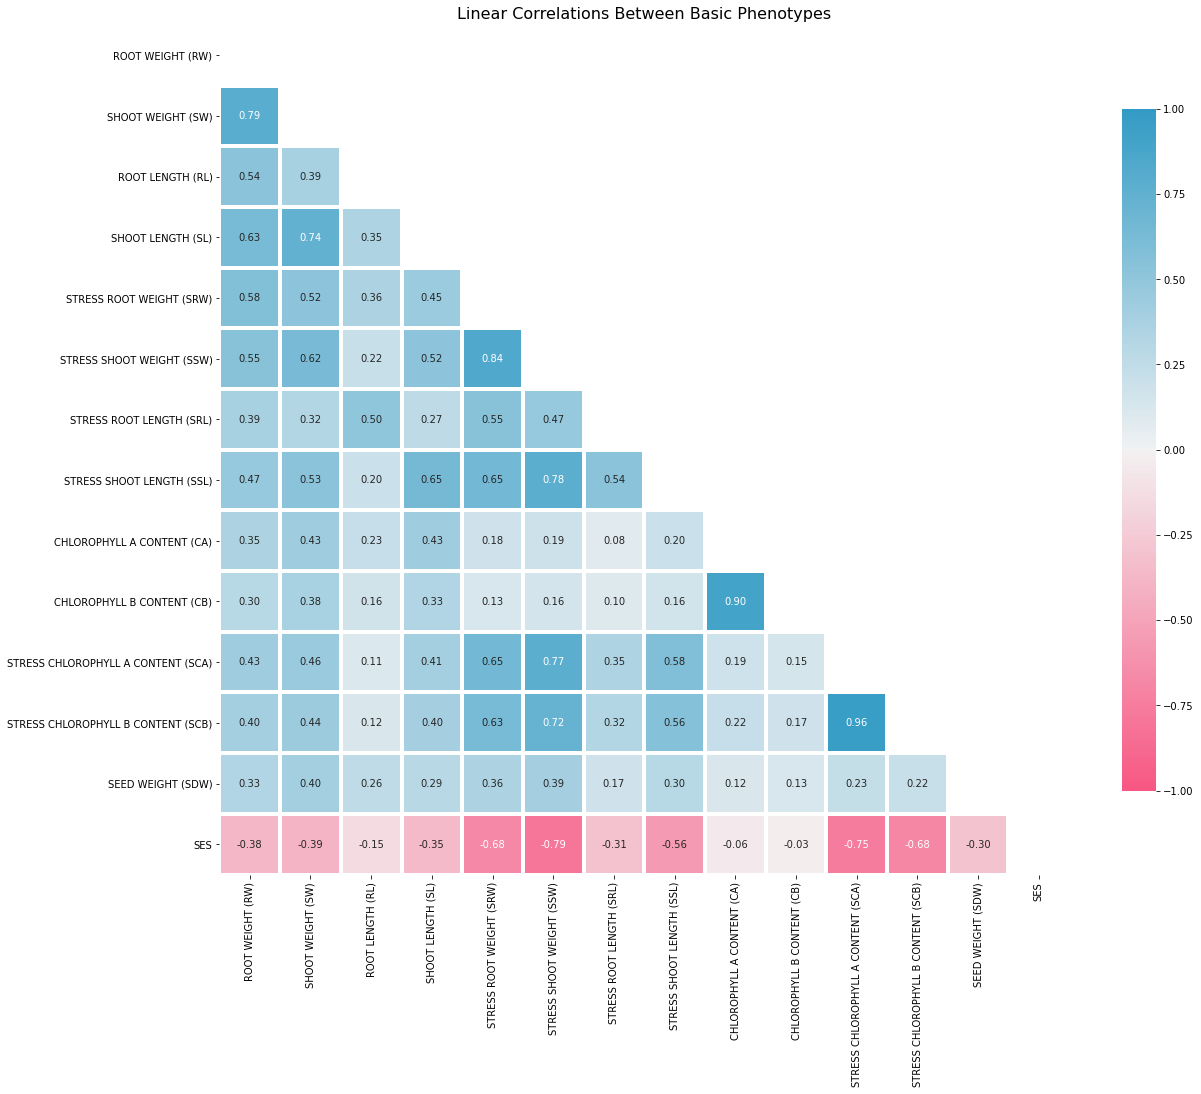

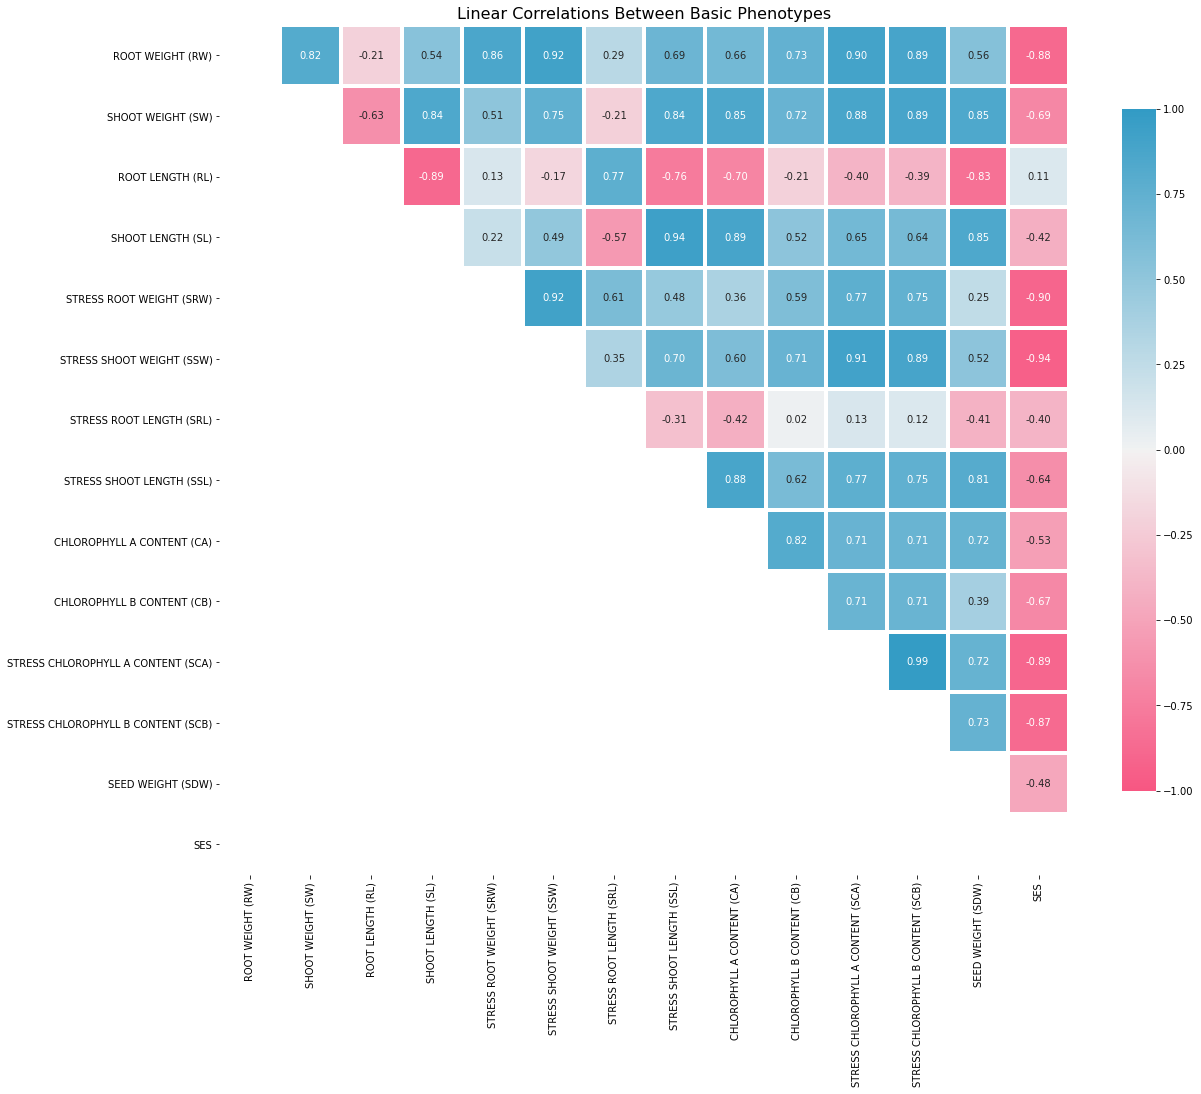

In [20]:
makehm(df4.corr(), df2.corr(), 'Linear Correlations Between Basic Phenotypes', 1.5, 4)

In [51]:
df2.corrwith(df4)

Root_weight             0.429294
Shoot_weight            0.415241
Root_length             0.231968
Shoot_length            0.322818
Stress_Root_weight      0.554048
Stress_Shoot_weight     0.635569
Stress_Root_length      0.395326
Stress_Shoot_length     0.348793
Chlorophyll_A           0.377980
Chlorophyll_B           0.497526
Stress_Chlorophyll_A    0.519877
Stress_Chlorophyll_B    0.486229
Seed_Weight             0.262452
dtype: float64

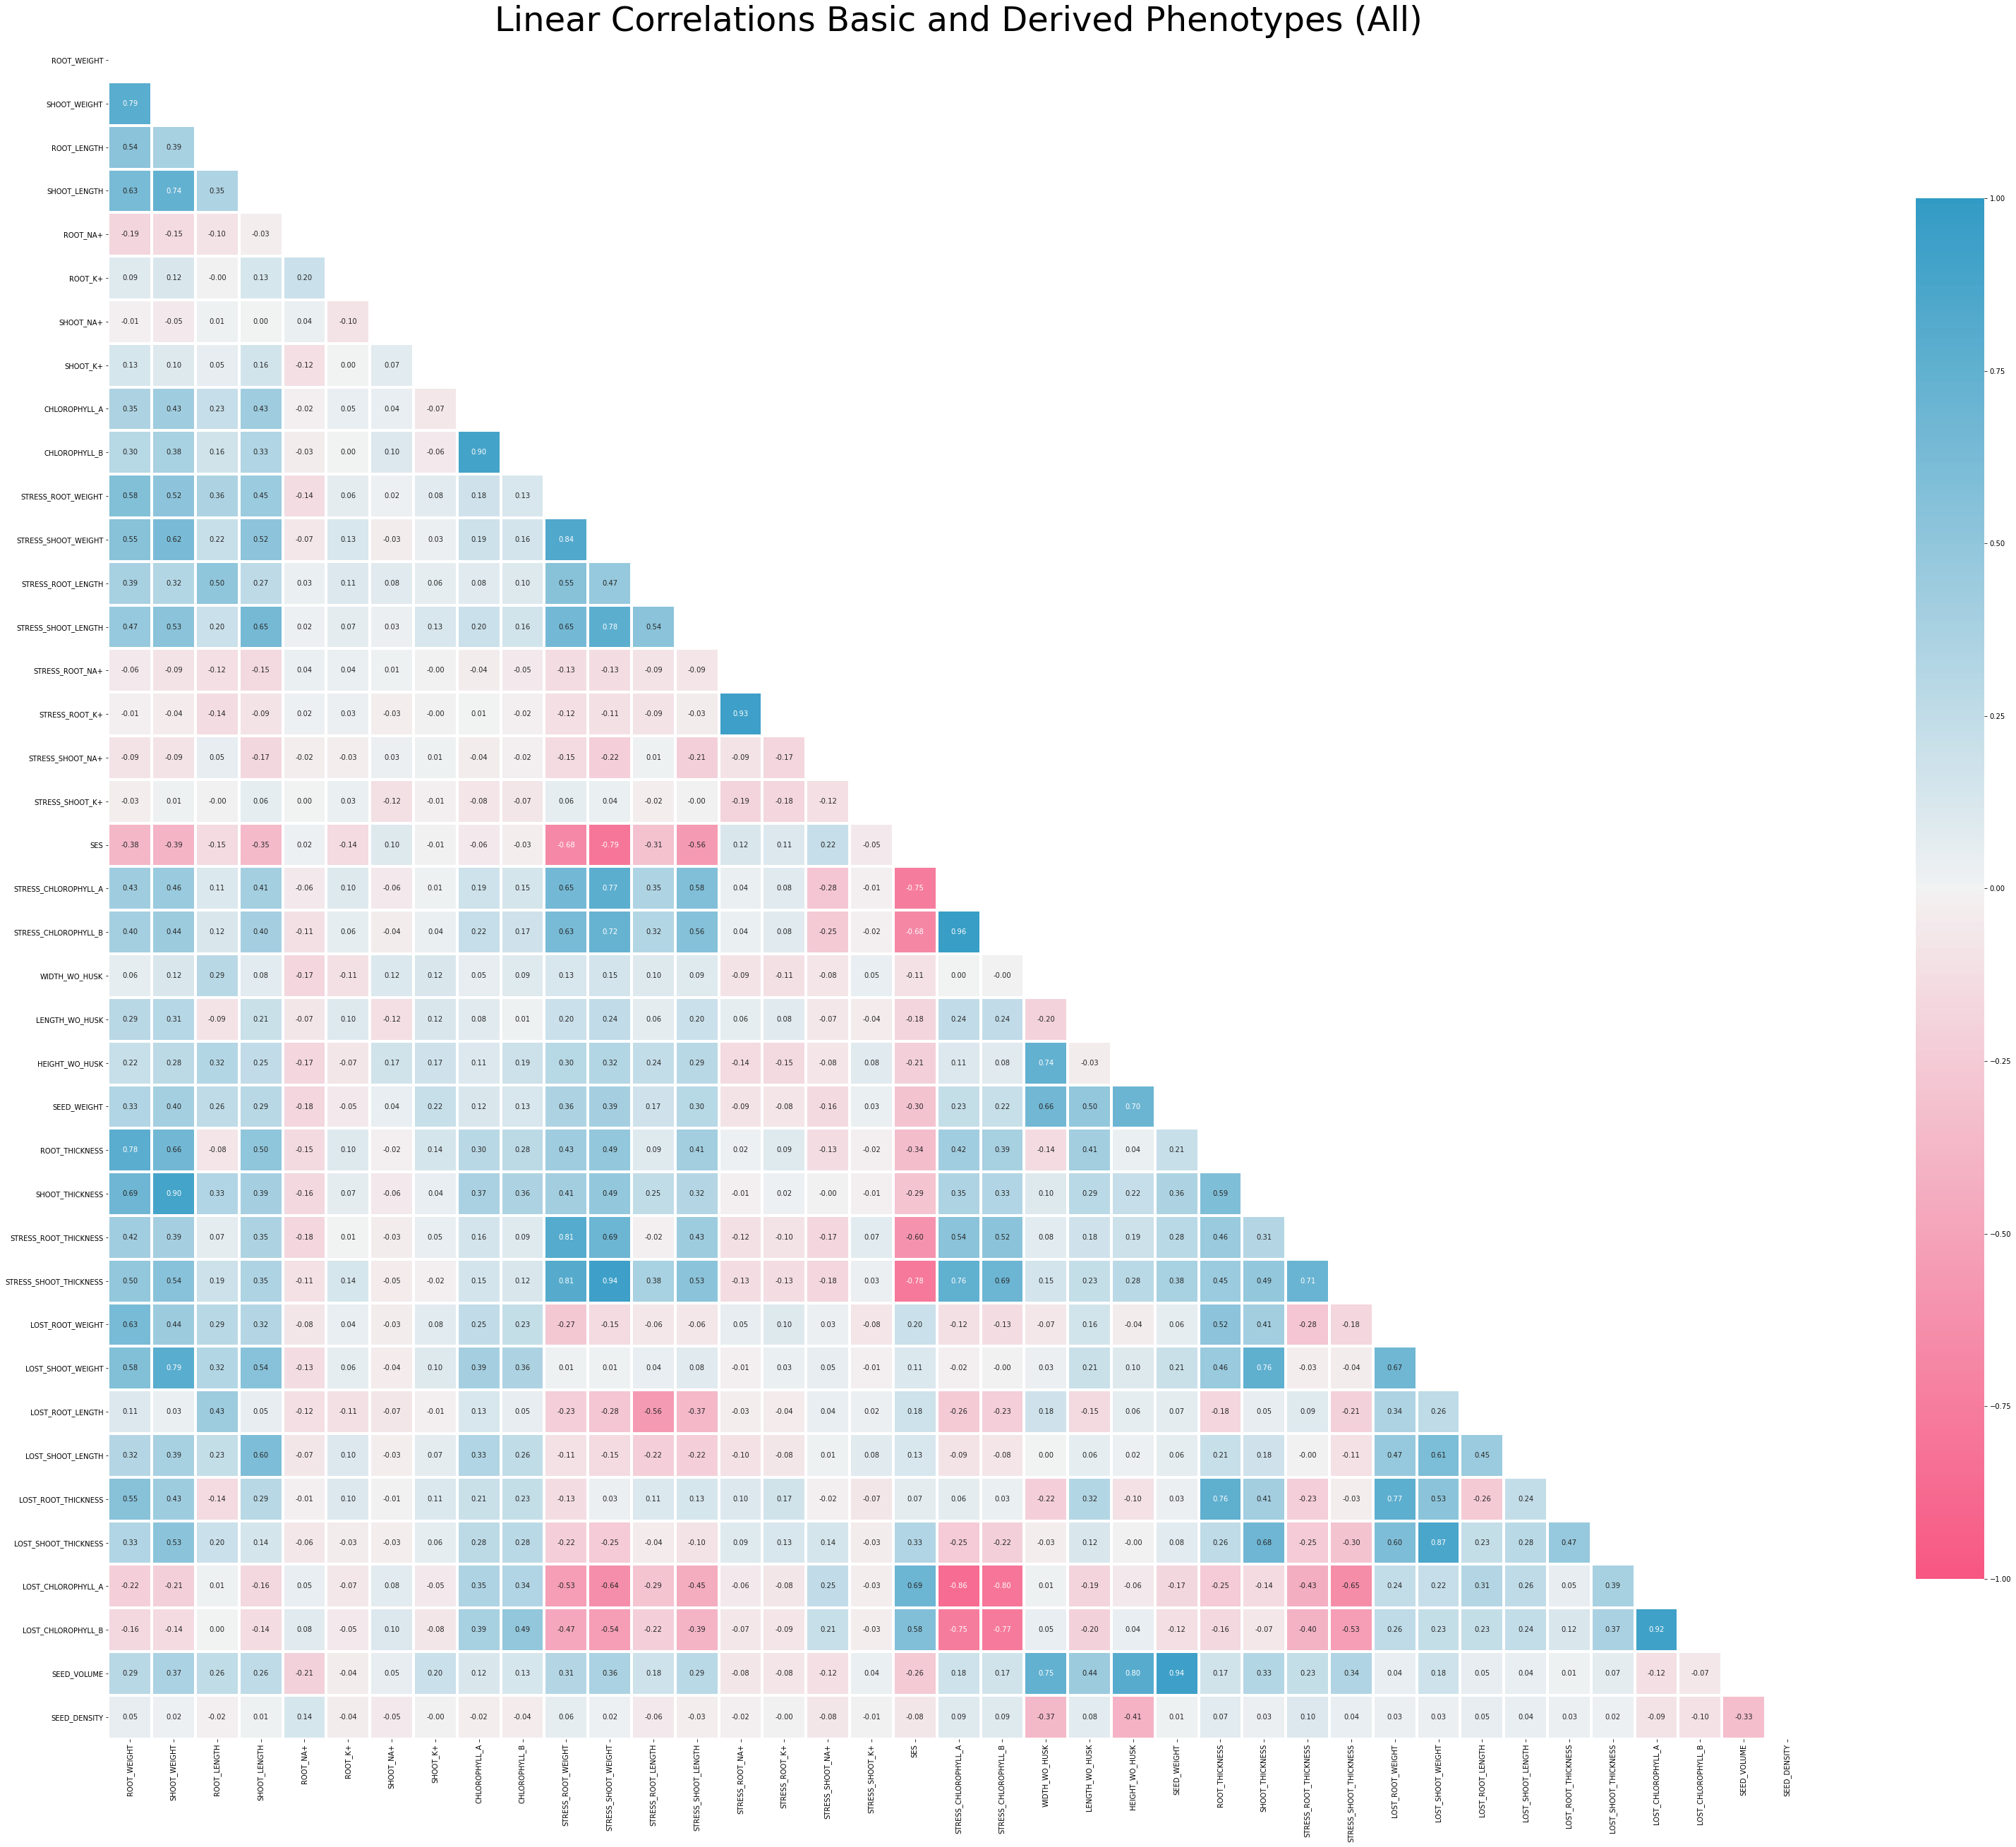

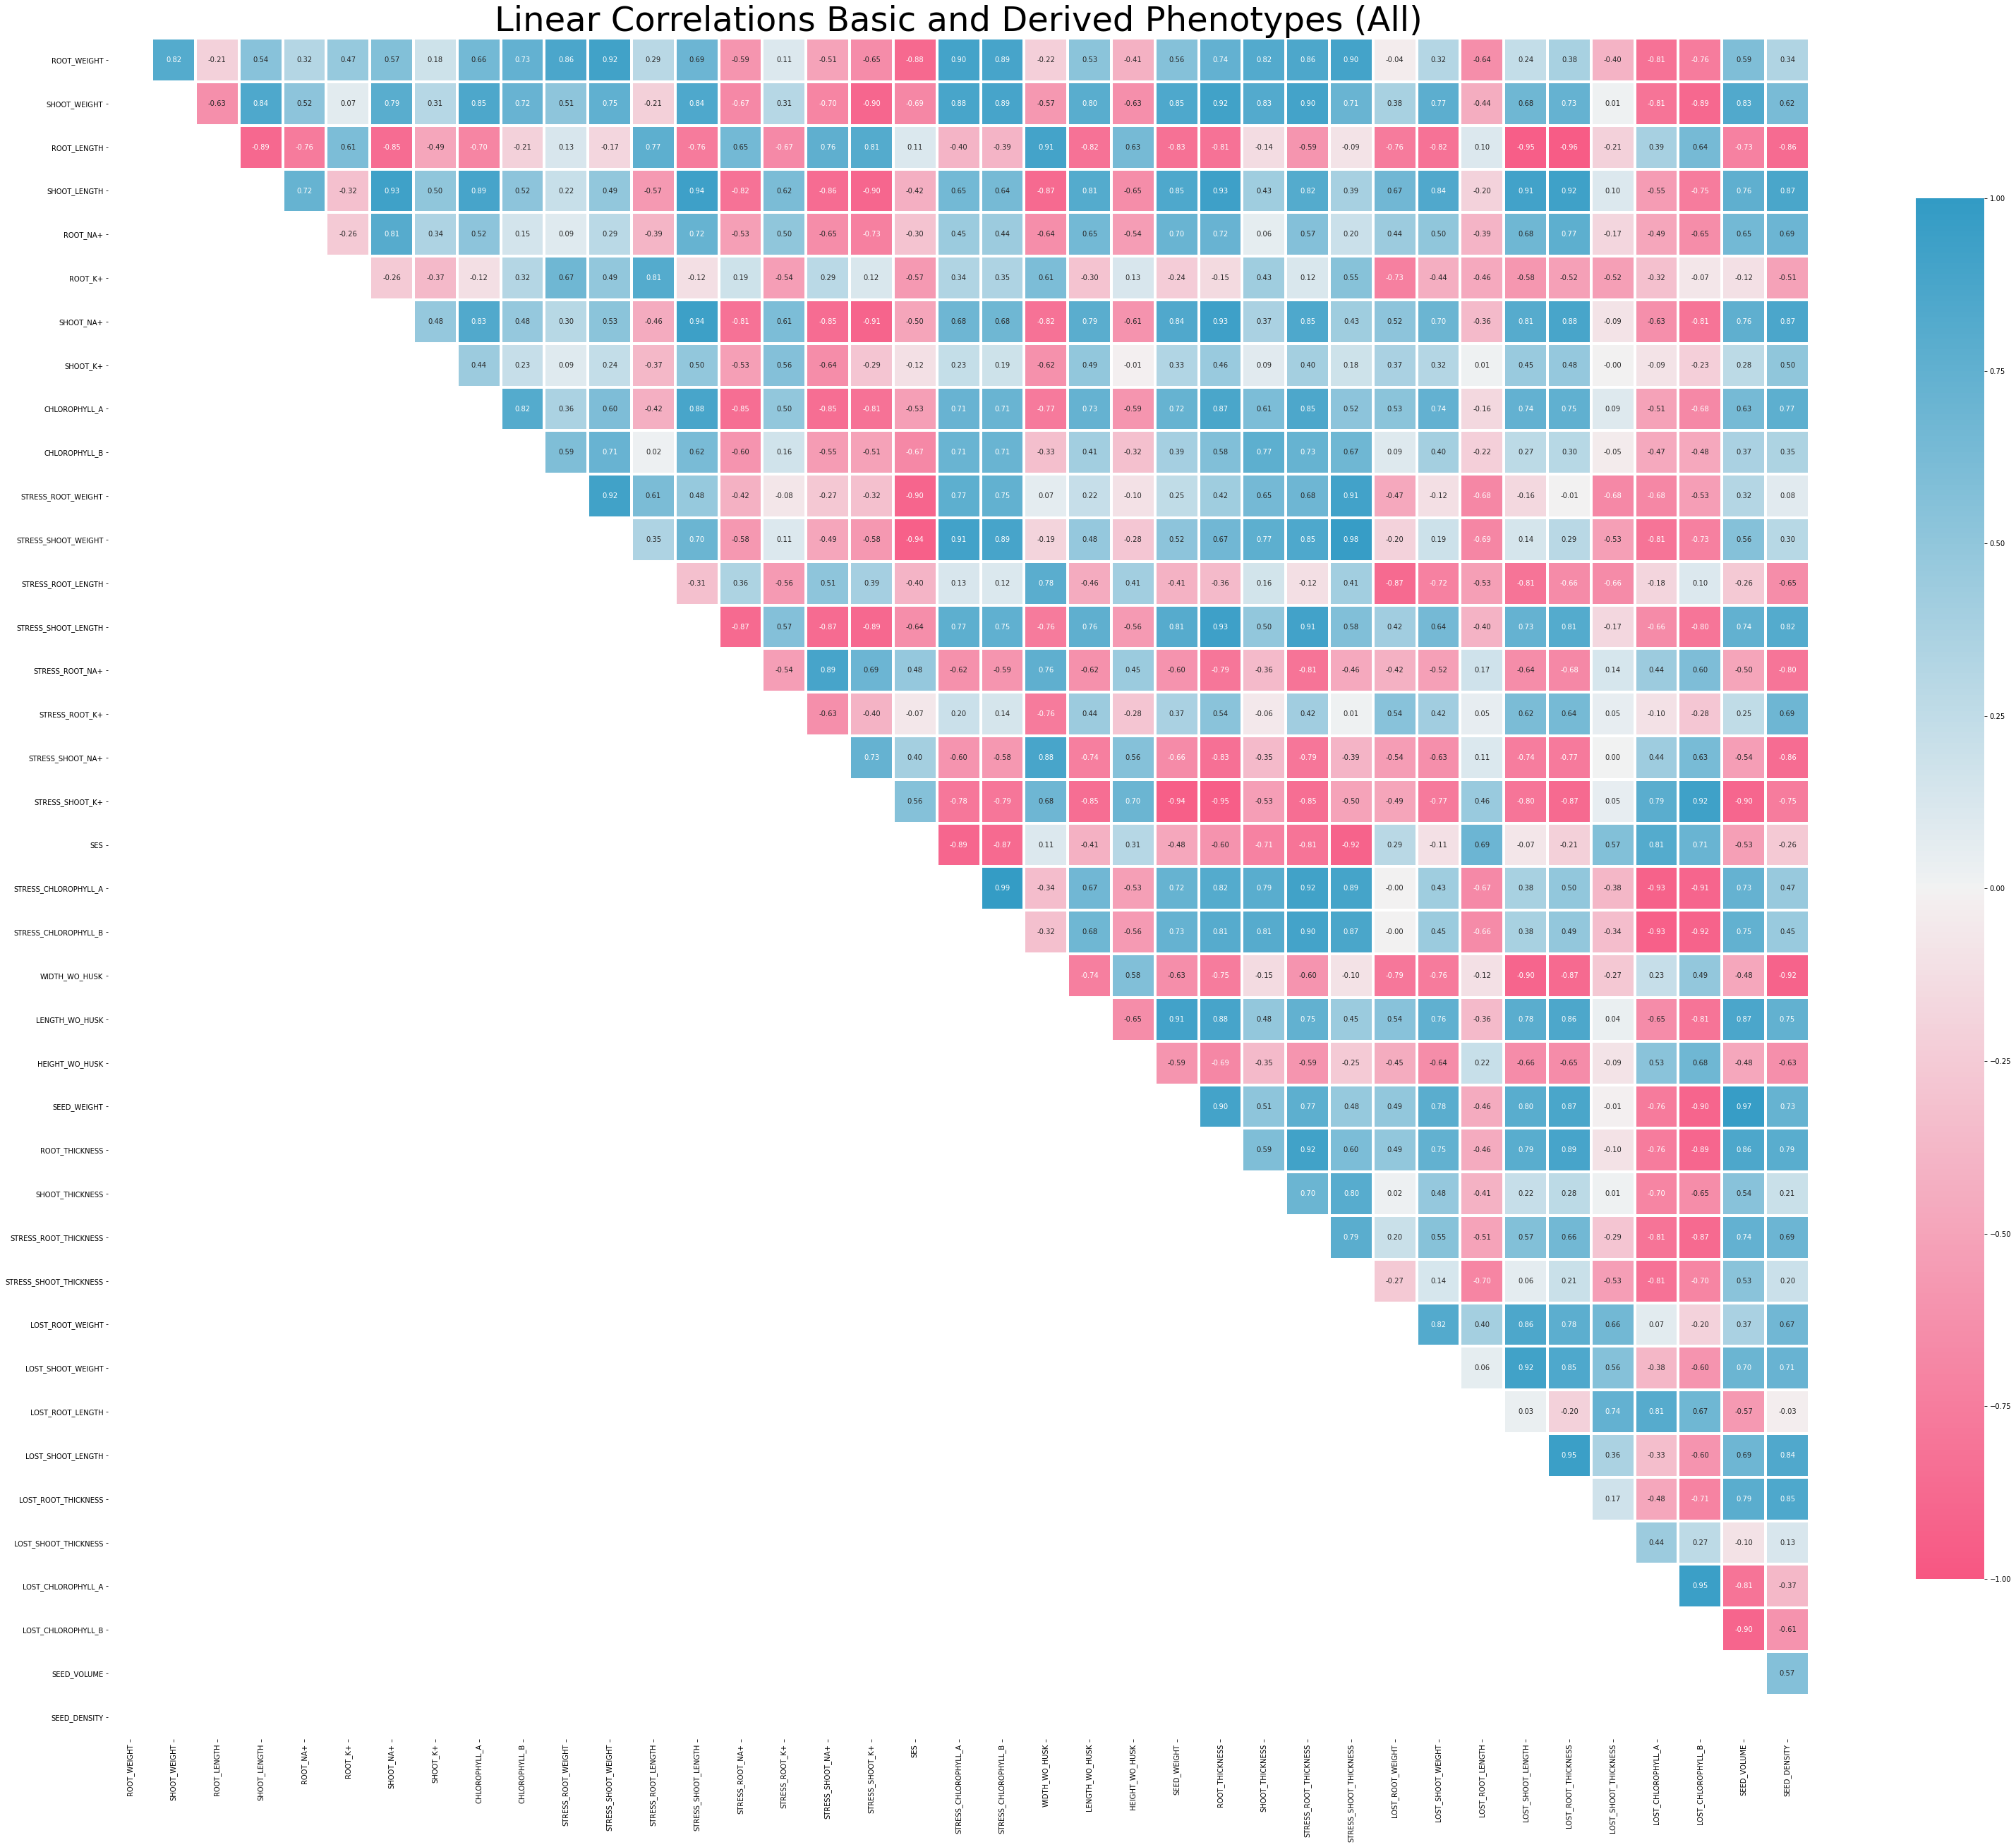

In [13]:
makehm(df3.corr(), df.corr(), 'Linear Correlations Basic and Derived Phenotypes (All)', 4.5, 12)

In [7]:
df.columns = ['accession_name', 'Root_thickness', 'Stress_Root_Na+', 'Shoot_weight',
       'Shoot_length', 'Stress_Shoot_Na+', 'Lost_Shoot_weight',
       'Height_WO_husk', 'Root_length', 'Stress_Chlorophyll_A', 'Root_Na+',
       'SES', 'Stress_Shoot_weight', 'Stress_Chlorophyll_B', 'Seed_density',
       'Stress_Shoot_thickness', 'Seed_volume', 'Shoot_K+', 'Seed_Weight',
       'Stress_Root_thickness', 'Lost_Chlorophyll_A', 'Stress_Root_length',
       'Lost_Chlorophyll_B', 'Root_weight', 'Lost_Root_weight',
       'Lost_Root_thickness', 'Chlorophyll_B', 'Lost_Shoot_thickness',
       'Stress_Shoot_K+', 'Shoot_Na+', 'Stress_Root_weight', 'Chlorophyll_A',
       'Stress_Shoot_length', 'Length_WO_husk', 'Root_K+', 'Shoot_thickness',
       'Width_WO_husk', 'Lost_Root_length', 'Stress_Root_K+',
       'Lost_Shoot_length']

In [9]:
df = df.loc[:, ['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length',
       'Shoot_length', 'Root_Na+', 'Root_K+', 'Shoot_Na+', 'Shoot_K+',
       'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Root_weight',
       'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
       'Stress_Root_Na+', 'Stress_Root_K+', 'Stress_Shoot_Na+',
       'Stress_Shoot_K+', 'SES', 'Stress_Chlorophyll_A',
       'Stress_Chlorophyll_B', 'Width_WO_husk', 'Length_WO_husk',
       'Height_WO_husk', 'Seed_Weight', 'Root_thickness', 'Shoot_thickness',
       'Stress_Root_thickness', 'Stress_Shoot_thickness', 'Lost_Root_weight',
       'Lost_Shoot_weight', 'Lost_Root_length', 'Lost_Shoot_length',
       'Lost_Root_thickness', 'Lost_Shoot_thickness', 'Lost_Chlorophyll_A',
       'Lost_Chlorophyll_B', 'Seed_volume', 'Seed_density']]

In [6]:
df3.columns

Index(['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length',
       'Shoot_length', 'Root_Na+', 'Root_K+', 'Shoot_Na+', 'Shoot_K+',
       'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Root_weight',
       'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
       'Stress_Root_Na+', 'Stress_Root_K+', 'Stress_Shoot_Na+',
       'Stress_Shoot_K+', 'SES', 'Stress_Chlorophyll_A',
       'Stress_Chlorophyll_B', 'Width_WO_husk', 'Length_WO_husk',
       'Height_WO_husk', 'Seed_Weight', 'Root_thickness', 'Shoot_thickness',
       'Stress_Root_thickness', 'Stress_Shoot_thickness', 'Lost_Root_weight',
       'Lost_Shoot_weight', 'Lost_Root_length', 'Lost_Shoot_length',
       'Lost_Root_thickness', 'Lost_Shoot_thickness', 'Lost_Chlorophyll_A',
       'Lost_Chlorophyll_B', 'Seed_volume', 'Seed_density'],
      dtype='object')

In [10]:
df3.corrwith(df)

Root_weight               0.429294
Shoot_weight              0.415241
Root_length               0.231968
Shoot_length              0.322818
Root_Na+                  0.373003
Root_K+                   0.286799
Shoot_Na+                 0.251809
Shoot_K+                  0.389380
Chlorophyll_A             0.377980
Chlorophyll_B             0.497526
Stress_Root_weight        0.554048
Stress_Shoot_weight       0.635569
Stress_Root_length        0.395326
Stress_Shoot_length       0.348793
Stress_Root_Na+           0.120184
Stress_Root_K+            0.091076
Stress_Shoot_Na+          0.331117
Stress_Shoot_K+           0.282470
SES                       0.513205
Stress_Chlorophyll_A      0.519877
Stress_Chlorophyll_B      0.486229
Width_WO_husk             0.246346
Length_WO_husk            0.465498
Height_WO_husk            0.543257
Seed_Weight               0.262452
Root_thickness            0.282882
Shoot_thickness           0.587117
Stress_Root_thickness     0.354246
Stress_Shoot_thickne

In [1124]:
reprg = { 'qCDP1' : 'LOC_Os01g66140',
        'qCDP2' : 'LOC_Os02g14980',
        'qCDP3' : 'LOC_Os03g03530',
        'qCDP4' : 'LOC_Os03g29360',
        'qCDP5' : 'LOC_Os05g08810',
        'qCDP6' : 'LOC_Os05g30420',
        'qCDP7' : 'LOC_Os06g35574',
        'qCDP8' : 'LOC_Os07g36630',
        'qCDP9' : 'LOC_Os08g43200',
        'qCDP10' : 'LOC_Os09g15420',
        'qCDP11' : 'LOC_Os09g19160',
        'qCDP12' : 'LOC_Os09g34340',
        'qCDP13' : 'LOC_Os10g34930',
        'qCDP14' : 'LOC_Os11g26790',
        'qCDP15' : 'LOC_Os12g06100',
        'qCDP16' : 'LOC_Os12g28100',
        'qCDP17' : 'LOC_Os12g41650'}

In [1125]:
df = pd.read_excel('../../Data/final_rice_v7_expression_matrix_48columns.xls')

In [1126]:
df = df[~df.iloc[:,1:].duplicated()]

In [1127]:
df = df.applymap(lambda x: 0 if str(x) == 'no' else x).applymap(lambda x: 1 if str(x) == 'yes' else x)

In [1128]:
df = df[df.iloc[:,1:17].sum(axis = 1) > 1]

In [1129]:
df2 = pd.read_table('../../Data/MSU7/all.locus_brief_info.7.0')[['locus','start', 'stop', 'annotation']]

In [1130]:
s = df2.sort_values('start').drop_duplicates('locus')[['locus', 'start']]
e = df2.sort_values('stop', ascending = False).drop_duplicates('locus')[['locus', 'stop', 'annotation']]
df2 = pd.merge(s,e)

In [977]:
df[df.duplicated('Locus_id', keep = False)] #drop 2,4,5

,Locus_id,Leaves-20 days,Post-emergence inflorescence,Pre-emergence inflorescence,Anther,Pistil,Seed-5 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Seed- 10 DAP,...,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days,Mature Sigma and Ovary,60days-Mature roots,Mock treatment-24hr,M.oryzae-R-24h
8267,LOC_Os10g22310,1.85530,0.0000,0.0000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,0,1,0,0
8268,LOC_Os10g22310,1.85530,0.0000,0.0000,0.000000,0.0000,0.00000,0.00000,0.00000,0.00000,...,0,0,0,0,0,0,0,1,0,0
23300,LOC_Os02g55670,2.68955,15.6042,11.8535,0.703374,162.3250,9.25659,1.65350,1.15347,2.37163,...,0,0,0,0,0,0,0,0,0,0
23364,LOC_Os02g55670,2.68955,15.6042,11.8535,0.703374,162.3250,9.25659,1.65350,1.15347,2.37163,...,0,0,0,0,0,0,0,0,0,0
39716,LOC_Os06g07923,2.48153,11.3470,17.4112,3.423420,19.0391,10.58670,8.23389,1.01986,1.14780,...,0,0,0,0,0,0,0,0,0,0
39717,LOC_Os06g07923,2.48153,11.3470,17.4112,3.423420,19.0391,10.58670,8.23389,1.01986,1.14780,...,0,0,0,0,0,0,0,0,0,0


In [1133]:
df2 = pd.merge(df, df2, left_on = 'Locus_id', right_on = 'locus', how = 'left')

In [1131]:
df = df.drop(index = [8268, 23364, 39716])

In [1132]:
df

,Locus_id,Leaves-20 days,Post-emergence inflorescence,Pre-emergence inflorescence,Anther,Pistil,Seed-5 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Seed- 10 DAP,...,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days,Mature Sigma and Ovary,60days-Mature roots,Mock treatment-24hr,M.oryzae-R-24h
0,LOC_Os01g01019,0.000000,1.19859,0.787847,0.322353,1.00938,0.721408,1.938840,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,LOC_Os01g01060,27.325500,95.78270,182.152000,36.080000,160.98700,168.422000,86.337900,15.269300,55.525400,...,0,0,0,0,0,0,1,0,0,0
2,LOC_Os01g01030,0.518297,6.17424,14.864400,0.899446,13.49500,11.136300,6.577680,0.459406,2.377440,...,0,0,0,0,0,0,0,1,0,0
3,LOC_Os01g01110,0.000000,0.00000,0.669189,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,LOC_Os01g01115,0.000000,1.08818,1.649930,0.000000,0.85732,0.373917,0.810011,0.000000,0.219613,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55981,ChrUn.fgenesh.gene.86,0.604088,2.47076,0.321147,0.094730,0.12102,0.100859,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
55982,ChrUn.fgenesh.gene.92,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
55984,ChrUn.fgenesh.gene.94,66.319300,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
55986,ChrUn.fgenesh.gene.96,31.378200,219.62400,36.733600,7.065210,19.29940,22.832700,23.654000,1.760790,4.470300,...,0,0,0,0,0,0,0,0,0,0


In [1134]:
df2

,Locus_id,Leaves-20 days,Post-emergence inflorescence,Pre-emergence inflorescence,Anther,Pistil,Seed-5 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Seed- 10 DAP,...,Control-Developing seeds-6days,LowTaste-Developing seeds-6days,Mature Sigma and Ovary,60days-Mature roots,Mock treatment-24hr,M.oryzae-R-24h,locus,start,stop,annotation
0,LOC_Os01g01019,0.000000,1.19859,0.787847,0.322353,1.00938,0.721408,1.938840,0.000000,0.000000,...,0,0,0,0,0,0,LOC_Os01g01019,11218,12435,expressed protein
1,LOC_Os01g01060,27.325500,95.78270,182.152000,36.080000,160.98700,168.422000,86.337900,15.269300,55.525400,...,0,0,1,0,0,0,LOC_Os01g01060,27136,28651,"40S ribosomal protein S5, putative, expressed"
2,LOC_Os01g01030,0.518297,6.17424,14.864400,0.899446,13.49500,11.136300,6.577680,0.459406,2.377440,...,0,0,0,1,0,0,LOC_Os01g01030,12648,15915,"monocopper oxidase, putative, expressed"
3,LOC_Os01g01110,0.000000,0.00000,0.669189,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,LOC_Os01g01110,57082,57972,expressed protein
4,LOC_Os01g01115,0.000000,1.08818,1.649930,0.000000,0.85732,0.373917,0.810011,0.000000,0.219613,...,0,0,0,0,0,0,LOC_Os01g01115,58658,61090,"pentatricopeptide, putative, expressed"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31531,ChrUn.fgenesh.gene.86,0.604088,2.47076,0.321147,0.094730,0.12102,0.100859,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,ChrUn.fgenesh.gene.86,556815,558215,expressed protein
31532,ChrUn.fgenesh.gene.92,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,ChrUn.fgenesh.gene.92,599609,600256,expressed protein
31533,ChrUn.fgenesh.gene.94,66.319300,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,ChrUn.fgenesh.gene.94,605684,605995,expressed protein
31534,ChrUn.fgenesh.gene.96,31.378200,219.62400,36.733600,7.065210,19.29940,22.832700,23.654000,1.760790,4.470300,...,0,0,0,0,0,0,ChrUn.fgenesh.gene.96,622197,626397,expressed protein


In [1092]:
pd.merge(dfi, df2)

,Locus_id,QTL,Leaves-20 days,Post-emergence inflorescence,Pre-emergence inflorescence,Anther,Pistil,Seed-5 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,...,Control-Developing seeds-6days,LowTaste-Developing seeds-6days,Mature Sigma and Ovary,60days-Mature roots,Mock treatment-24hr,M.oryzae-R-24h,locus,start,stop,annotation
0,LOC_Os01g66140,qCDP1,4.881700,4.449100,7.582600,4.115040,5.152060,4.48587,9.390520,0.880779,...,0,0,0,1,0,0,LOC_Os01g66140,38413166,38424621,"plus-3 domain containing protein, putative, ex..."
1,LOC_Os02g14980,qCDP2,5.142000,7.979110,3.356230,3.335700,8.564560,2.32986,32.441300,2.011990,...,0,0,0,1,0,0,LOC_Os02g14980,8358769,8362960,"calcium-binding EF hand family protein, putati..."
2,LOC_Os03g03530,qCDP3,6.984620,13.289700,9.306260,18.327000,6.766580,5.39904,11.126300,1.518280,...,0,0,0,0,0,0,LOC_Os03g03530,1525179,1527103,expressed protein
3,LOC_Os03g29360,qCDP4,2.340400,3.529990,1.517470,3.667020,5.470120,5.60154,0.000000,0.000000,...,0,0,0,1,0,0,LOC_Os03g29360,16715427,16715939,expressed protein
4,LOC_Os05g08810,qCDP5,12.862100,10.566100,9.111480,7.985200,10.509400,6.04585,9.701790,5.282460,...,0,0,0,1,0,0,LOC_Os05g08810,4854173,4865677,"phosphatidylinositol 3-kinase, root isoform, p..."
5,LOC_Os05g30420,qCDP6,5.388580,14.593800,14.027900,1.852830,26.820300,22.12340,5.720580,0.746062,...,0,1,0,0,0,0,LOC_Os05g30420,17630980,17633380,expressed protein
6,LOC_Os06g35574,qCDP7,0.000000,0.000000,0.000000,0.000000,1.523890,1.30794,0.000000,0.000000,...,0,0,0,0,0,0,LOC_Os06g35574,20760705,20761602,"mki67 protein, putative, expressed"
7,LOC_Os07g36630,qCDP8,0.175674,1.969750,1.997310,1.246550,1.125760,1.50417,2.292910,0.000000,...,0,0,0,1,0,0,LOC_Os07g36630,21910216,21915284,CSLF8 - cellulose synthase-like family F; beta...
8,LOC_Os08g43200,qCDP9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,LOC_Os08g43200,27320517,27321388,dehydration-responsive element-binding protein...
9,LOC_Os09g15420,qCDP10,1.690540,4.679820,6.264970,24.989900,6.537330,4.42463,2.205660,14.906100,...,0,0,0,1,0,0,LOC_Os09g15420,9437667,9442553,NAD dependent epimerase/dehydratase family pro...


In [1093]:
dfi = pd.DataFrame(reprg, index=['Locus_id']).transpose()
dfi['QTL'] = dfi.index
df3 = pd.DataFrame()
for q,c,s,e in pd.merge(dfi, df2)[['QTL', 'Locus_id', 'start', 'stop']].itertuples(index = False):
    tdf = df2[df2['Locus_id'].apply(lambda x: x[6:8]) == c[6:8]]
    tdf = tdf[((tdf['start'] > (s - 100000)) & (tdf['stop'] < (e + 100000)))]
    tdf['QTL'] = q
    df3 = pd.concat([df3,tdf], axis = 0).reset_index(drop = True)

In [1094]:
df3.to_clipboard()

In [1135]:
df3

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
317,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.79510,7.500500,16.227000,5.797790,5.667740,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
318,qCDP1,LOC_Os01g66000,"NADH dehydrogenase I subunit N, putative, expr...",2.42114,0.000000,0.000000,0.000000,0.078056,0.082695,5.396320,...,0,0,0,0,0,0,0,0,0,0
319,qCDP1,LOC_Os01g65920,"F-box/LRR-repeat protein 2, putative, expressed",46.13460,32.641100,66.089700,70.666000,71.651800,91.166500,113.964000,...,0,0,0,0,0,0,0,0,0,0
316,qCDP1,LOC_Os01g66350,"DUF647 domain containing protein, putative, ex...",56.71890,10.245900,44.886400,5.688130,5.465030,25.883400,52.766000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,qCDP17,LOC_Os12g41490,cysteine-rich receptor-like protein kinase 8 p...,1.81567,0.297886,0.000288,0.202435,0.149882,0.278273,0.440457,...,0,0,0,0,1,0,0,0,1,0
310,qCDP17,LOC_Os12g41500,"rhodanese-like domain containing protein, puta...",49.34270,16.405100,39.912200,6.314700,5.758300,7.804370,28.957600,...,0,0,0,0,0,0,0,0,0,0
311,qCDP17,LOC_Os12g41720,"PLA IIIA/PLP7, putative, expressed",7.43660,1.039410,6.224160,1.015270,0.834124,0.630419,3.601430,...,0,0,0,0,0,0,0,0,0,0
312,qCDP17,LOC_Os12g41715,"DEAD-box ATP-dependent RNA helicase, putative,...",27.99190,3.318000,45.816400,2.206400,2.635360,8.166130,70.428900,...,0,0,0,0,0,0,0,0,0,0


In [1095]:
df4 = df3[['QTL', 'Locus_id', 'annotation', 'Seed-5 DAP', 'Seed- 10 DAP',
       'Embryo- 25 DAP', 'Endosperm- 25 DAP', 'Endosperm- 25 DAP (replicate)',
       'Anther', 'Pistil', 'Pre-emergence inflorescence',
       'Post-emergence inflorescence', 'Leaves-20 days',
       'Leaves- 20 days (replicate)', 'Shoots',
       'Seedling four-leaf stage F1 93-11/Nipp',
       'Seedling four-leaf stage F1 Nipp/93-11',
       'Seedling four-leaf stage 93-11', 'Seedling four-leaf stage ',
       'Germinating seed-3 days', 'Stem-60 days', 'Callus-35 days',
       '60days-Mature roots', 'Mature leaves-60 days', 'Mature pollen',
       'Immature panicle-90 days', 'Mature Sigma and Ovary',
       'Salt Stress-Leaves-2wks', 'Salt Stress-Roots-2wks',
       'Drought Stress-Leaves-2wks', 'Drought Stress-Roots-2wks',
       'Cold Stress-Leaves-2wks', 'Cold Stress-Roots-2wks',
       'M.oryzae infected-Resistant-6h', 'M.oryzae infected-Resistant-12h',
       'M.oryzae-R-24h', 'Mock treatment-24hr', 'Untreated-leaves-2wks',
       'Untreated-Roots-2wks', 'M.oryzae infected-Susceptible-6h',
       'M.oryzae infected-Susceptible-12h',
       'M.oryzae infected-Susceptible-24h',
       'M.oryzae infected-Susceptible-96h',
       'Rice leaf-beet armyworm damaged-24h',
       'Rice leaf- Mechanical damaged-24h',
       'Rice leaf-Water weevil damaged-24h',
       'HighMilling-Developing seeds-6days',
       'HighTaste-Developing seeds-6days', 'LowMilling-Developing seeds-6days',
       'Control-Developing seeds-6days', 'LowTaste-Developing seeds-6days']]

In [1060]:
df4.to_csv('../Figures and tables/Expression Table.csv', index = False)

In [1096]:
t = []
for i,r in df4.iterrows():
    if 'transposon' in r['annotation'].lower():
        pass
    else:
        t.append(i)
df4 = df4.loc[t,:]
df4 = df4.drop_duplicates('Locus_id').reset_index(drop = True)

In [1064]:
df4.to_csv('../Figures and tables/Expression Table no transposons.csv', index = False)

In [1067]:
locs = 'LOC_Os01g66120, LOC_Os01g66350, LOC_Os01g66050, LOC_Os01g66000, LOC_Os01g65920, LOC_Os02g14980, LOC_Os02g14860, LOC_Os02g14900, LOC_Os02g14929, LOC_Os03g03590, LOC_Os03g03540, LOC_Os03g03510, LOC_Os03g03460, LOC_Os03g03450, LOC_Os03g03700, LOC_Os03g03720, LOC_Os03g03810, LOC_Os03g04060, LOC_Os03g04070, LOC_Os05g08730, LOC_Os05g08620, LOC_Os05g08770, LOC_Os05g08770, LOC_Os05g08920, LOC_Os05g30480, LOC_Os05g30430, LOC_Os05g30320, LOC_Os06g35530, LOC_Os06g35574, LOC_Os06g35520, LOC_Os06g35410, LOC_Os07g36600, LOC_Os07g36740, LOC_Os07g36750, LOC_Os07g36700, LOC_Os07g36690, LOC_Os07g37030, LOC_Os07g37610, LOC_Os07g37210, LOC_Os07g37240, LOC_Os07g37580, LOC_Os07g37640, LOC_Os08g43200, LOC_Os08g43130, LOC_Os08g43270, LOC_Os08g43370, LOC_Os08g43410, LOC_Os09g15420, LOC_Os09g15365, LOC_Os09g15500, LOC_Os09g15520, LOC_Os09g18470, LOC_Os09g18450, LOC_Os09g34340, LOC_Os09g34900, LOC_Os09g35010, LOC_Os09g34200, LOC_Os09g34160, LOC_Os09g34150, LOC_Os10g34930, LOC_Os10g35050, LOC_Os10g35110, LOC_Os10g35180, LOC_Os10g34680, LOC_Os11g26790, LOC_Os12g05990, LOC_Os12g06110, LOC_Os12g06330, LOC_Os12g28260, LOC_Os12g28100, LOC_Os12g28250, LOC_Os12g41650, LOC_Os12g41680, LOC_Os12g41700, LOC_Os12g41380'.split(', ')

In [1073]:
t = []
for l in locs:
    if l not in df4['Locus_id'].to_list():
        t.append(l)

In [1076]:
t

['LOC_Os01g66350',
 'LOC_Os01g66000',
 'LOC_Os01g65920',
 'LOC_Os03g03700',
 'LOC_Os03g03720',
 'LOC_Os03g03810',
 'LOC_Os03g04060',
 'LOC_Os03g04070',
 'LOC_Os05g08620',
 'LOC_Os06g35410',
 'LOC_Os07g36750',
 'LOC_Os07g37030',
 'LOC_Os07g37610',
 'LOC_Os07g37210',
 'LOC_Os07g37240',
 'LOC_Os07g37580',
 'LOC_Os07g37640',
 'LOC_Os08g43410',
 'LOC_Os09g15365',
 'LOC_Os09g18470',
 'LOC_Os09g18450',
 'LOC_Os09g35010',
 'LOC_Os09g34160',
 'LOC_Os09g34150',
 'LOC_Os10g35180',
 'LOC_Os10g34680',
 'LOC_Os12g06110',
 'LOC_Os12g06330',
 'LOC_Os12g28260',
 'LOC_Os12g41380']

In [ ]:
#df4 =  pd.concat([df3[(df3['QTL'] == 'qCDP1') | (df3['QTL'] == 'qCDP15') | (df3['QTL'] == 'qCDP17')],
        df3[(df3['QTL'] == 'qCDP2') | (df3['QTL'] == 'qCDP4') | (df3['QTL'] == 'qCDP5') | (df3['QTL'] == 'qCDP14')],
                 df3[(df3['QTL'] == 'qCDP3') | (df3['QTL'] == 'qCDP6') | (df3['QTL'] == 'qCDP7') | (df3['QTL'] == 'qCDP8') |
                    (df3['QTL'] == 'qCDP9') | (df3['QTL'] == 'qCDP10') | (df3['QTL'] == 'qCDP11') | (df3['QTL'] == 'qCDP12') |
                    (df3['QTL'] == 'qCDP13') | (df3['QTL'] == 'qCDP16')]
                 ], axis = 0)


In [1097]:
qdf = pd.read_excel('../Figures and tables/S2 Table Identified QTLs.xlsx')

In [1059]:
df4

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
1,qCDP1,LOC_Os01g66060,expressed protein,0.000000,0.000000,0.000000,0.000000,1.377710,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.795100,7.500500,16.227000,5.797790,5.667740,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
3,qCDP1,LOC_Os01g66100,"gibberellin 20 oxidase 2, putative, expressed",6.787130,0.793680,2.564160,0.000000,0.000000,1.775430,19.499000,...,0,0,0,0,0,0,0,0,0,0
4,qCDP1,LOC_Os01g66020,"protein kinase family protein, putative, expre...",0.305826,0.000000,0.000000,0.000000,0.000000,0.277186,1.698780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,qCDP17,LOC_Os12g41720,"PLA IIIA/PLP7, putative, expressed",7.436600,1.039410,6.224160,1.015270,0.834124,0.630419,3.601430,...,0,0,0,0,0,0,0,0,0,0
321,qCDP17,LOC_Os12g41750,"transposon protein, putative, unclassified, ex...",0.000000,0.000000,0.000000,0.000000,0.000000,0.266929,0.000000,...,0,0,0,0,0,0,0,0,0,0
322,qCDP17,LOC_Os12g41715,"DEAD-box ATP-dependent RNA helicase, putative,...",27.991900,3.318000,45.816400,2.206400,2.635360,8.166130,70.428900,...,0,0,0,0,0,0,0,0,0,0
323,qCDP17,LOC_Os12g41650,helix-loop-helix DNA-binding domain containing...,2.575780,0.000000,0.825528,0.000000,0.000000,2.736470,5.574120,...,0,0,0,0,0,0,0,0,0,0


In [1068]:
locs

['LOC_Os01g66120',
 'LOC_Os01g66350',
 'LOC_Os01g66050',
 'LOC_Os01g66000',
 'LOC_Os01g65920',
 'LOC_Os02g14980',
 'LOC_Os02g14860',
 'LOC_Os02g14900',
 'LOC_Os02g14929',
 'LOC_Os03g03590',
 'LOC_Os03g03540',
 'LOC_Os03g03510',
 'LOC_Os03g03460',
 'LOC_Os03g03450',
 'LOC_Os03g03700',
 'LOC_Os03g03720',
 'LOC_Os03g03810',
 'LOC_Os03g04060',
 'LOC_Os03g04070',
 'LOC_Os05g08730',
 'LOC_Os05g08620',
 'LOC_Os05g08770',
 'LOC_Os05g08770',
 'LOC_Os05g08920',
 'LOC_Os05g30480',
 'LOC_Os05g30430',
 'LOC_Os05g30320',
 'LOC_Os06g35530',
 'LOC_Os06g35574',
 'LOC_Os06g35520',
 'LOC_Os06g35410',
 'LOC_Os07g36600',
 'LOC_Os07g36740',
 'LOC_Os07g36750',
 'LOC_Os07g36700',
 'LOC_Os07g36690',
 'LOC_Os07g37030',
 'LOC_Os07g37610',
 'LOC_Os07g37210',
 'LOC_Os07g37240',
 'LOC_Os07g37580',
 'LOC_Os07g37640',
 'LOC_Os08g43200',
 'LOC_Os08g43130',
 'LOC_Os08g43270',
 'LOC_Os08g43370',
 'LOC_Os08g43410',
 'LOC_Os09g15420',
 'LOC_Os09g15365',
 'LOC_Os09g15500',
 'LOC_Os09g15520',
 'LOC_Os09g18470',
 'LOC_Os09g1

In [1063]:
df4

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
1,qCDP1,LOC_Os01g66060,expressed protein,0.000000,0.000000,0.000000,0.000000,1.377710,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.795100,7.500500,16.227000,5.797790,5.667740,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
3,qCDP1,LOC_Os01g66100,"gibberellin 20 oxidase 2, putative, expressed",6.787130,0.793680,2.564160,0.000000,0.000000,1.775430,19.499000,...,0,0,0,0,0,0,0,0,0,0
4,qCDP1,LOC_Os01g66020,"protein kinase family protein, putative, expre...",0.305826,0.000000,0.000000,0.000000,0.000000,0.277186,1.698780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,qCDP17,LOC_Os12g41500,"rhodanese-like domain containing protein, puta...",49.342700,16.405100,39.912200,6.314700,5.758300,7.804370,28.957600,...,0,0,0,0,0,0,0,0,0,0
311,qCDP17,LOC_Os12g41720,"PLA IIIA/PLP7, putative, expressed",7.436600,1.039410,6.224160,1.015270,0.834124,0.630419,3.601430,...,0,0,0,0,0,0,0,0,0,0
312,qCDP17,LOC_Os12g41715,"DEAD-box ATP-dependent RNA helicase, putative,...",27.991900,3.318000,45.816400,2.206400,2.635360,8.166130,70.428900,...,0,0,0,0,0,0,0,0,0,0
313,qCDP17,LOC_Os12g41650,helix-loop-helix DNA-binding domain containing...,2.575780,0.000000,0.825528,0.000000,0.000000,2.736470,5.574120,...,0,0,0,0,0,0,0,0,0,0


In [1099]:
t = []
for l,r in qdf.itertuples(index = False):
    for g in r.split(', '):
        t.append((l,g))

qdf = pd.DataFrame(t, columns = qdf.columns)

In [1100]:
qdf = pd.merge(qdf, df2, left_on='Relevant genes', right_on = 'Locus_id')

In [1101]:
qdf = qdf.rename(columns = {'Locus name' : 'QTL'})

In [1102]:
qdf = qdf[df4.columns]

In [1103]:
df4 = pd.concat([df4, qdf], axis = 0).reset_index(drop = True)

In [1104]:
df4[0] = df4['QTL'].apply(lambda x : int(x.split('P')[1]))
df4 = df4.sort_values(0).drop(columns = 0)

In [1105]:
df4 = df4.drop_duplicates('Locus_id')

In [1106]:
df3 = df4.copy()
df4 =  pd.concat([df3[(df3['QTL'] == 'qCDP1') | (df3['QTL'] == 'qCDP15') | (df3['QTL'] == 'qCDP17')],
        df3[(df3['QTL'] == 'qCDP2') | (df3['QTL'] == 'qCDP4') | (df3['QTL'] == 'qCDP5') | (df3['QTL'] == 'qCDP14')],
                 df3[(df3['QTL'] == 'qCDP3') | (df3['QTL'] == 'qCDP6') | (df3['QTL'] == 'qCDP7') | (df3['QTL'] == 'qCDP8') |
                    (df3['QTL'] == 'qCDP9') | (df3['QTL'] == 'qCDP10') | (df3['QTL'] == 'qCDP11') | (df3['QTL'] == 'qCDP12') |
                    (df3['QTL'] == 'qCDP13') | (df3['QTL'] == 'qCDP16')]
                 ], axis = 0)

In [1084]:
df4

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
1,qCDP1,LOC_Os01g66060,expressed protein,0.000000,0.00000,0.000000,0.00000,1.37771,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.795100,7.50050,16.227000,5.79779,5.66774,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
3,qCDP1,LOC_Os01g66100,"gibberellin 20 oxidase 2, putative, expressed",6.787130,0.79368,2.564160,0.00000,0.00000,1.775430,19.499000,...,0,0,0,0,0,0,0,0,0,0
4,qCDP1,LOC_Os01g66020,"protein kinase family protein, putative, expre...",0.305826,0.00000,0.000000,0.00000,0.00000,0.277186,1.698780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,qCDP16,LOC_Os12g28250,"disease resistance protein RPM1, putative, exp...",1.523070,0.00000,3.083700,0.00000,0.00000,0.307096,4.553320,...,0,0,0,0,0,0,0,0,0,0
372,qCDP17,LOC_Os12g41650,helix-loop-helix DNA-binding domain containing...,2.575780,0.00000,0.825528,0.00000,0.00000,2.736470,5.574120,...,0,0,0,0,0,0,0,0,0,0
373,qCDP17,LOC_Os12g41680,"No apical meristem protein, putative, expressed",10.293200,4.65604,0.000000,1.50064,1.33939,17.440400,4.703320,...,0,0,0,0,0,0,0,0,0,0
374,qCDP17,LOC_Os12g41700,"LSD1 zinc finger domain containing protein, ex...",10.282400,1.92166,5.756990,2.87648,2.40513,58.024600,17.649800,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#LOC_Os01g66350, LOC_Os01g66000, LOC_Os01g65920 belong to QCDP17


In [1108]:
df4.iloc[:, :-3].drop_duplicates().to_csv('../Figures and tables/Expression Table rqtls added.csv', index = False)

In [1086]:
df4.drop_duplicates('Locus_id')

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
1,qCDP1,LOC_Os01g66060,expressed protein,0.000000,0.000000e+00,0.000000,0.000000,1.377710,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.795100,7.500500e+00,16.227000,5.797790,5.667740,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
3,qCDP1,LOC_Os01g66100,"gibberellin 20 oxidase 2, putative, expressed",6.787130,7.936800e-01,2.564160,0.000000,0.000000,1.775430,19.499000,...,0,0,0,0,0,0,0,0,0,0
4,qCDP1,LOC_Os01g66020,"protein kinase family protein, putative, expre...",0.305826,0.000000e+00,0.000000,0.000000,0.000000,0.277186,1.698780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,qCDP12,LOC_Os09g34150,"NBS-LRR disease resistance protein, putative, ...",2.092990,0.000000e+00,3.391630,0.000000,0.000000,0.238048,5.446530,...,0,0,0,0,0,0,0,0,0,0
366,qCDP13,LOC_Os10g35180,"white-brown complex homolog protein 11, putati...",0.220067,0.000000e+00,6.198160,0.000000,0.000000,6.523970,55.425400,...,0,0,0,0,0,0,0,0,0,0
367,qCDP13,LOC_Os10g34680,vacuolar protein sorting-associated protein 52...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.270700,0.000000,...,0,0,0,0,0,0,0,0,0,0
369,qCDP16,LOC_Os12g28260,"cyclic nucleotide-gated ion channel, putative,...",0.114570,4.150000e-09,0.262632,0.046812,0.040834,73.401700,0.256276,...,0,0,0,0,0,0,0,0,0,0


In [457]:
df5 = pd.read_csv('../Figures and tables/Expression Table manual sorted.csv')
df5.index = df5['QTL']
df5 = df5.iloc[:,3:-3].applymap(lambda x: 0 if x == 'no' else x).applymap(lambda x: 1 if x == 'yes' else x)
df5 = df5[(df5.sum(axis = 1) > 1)]

<AxesSubplot:>

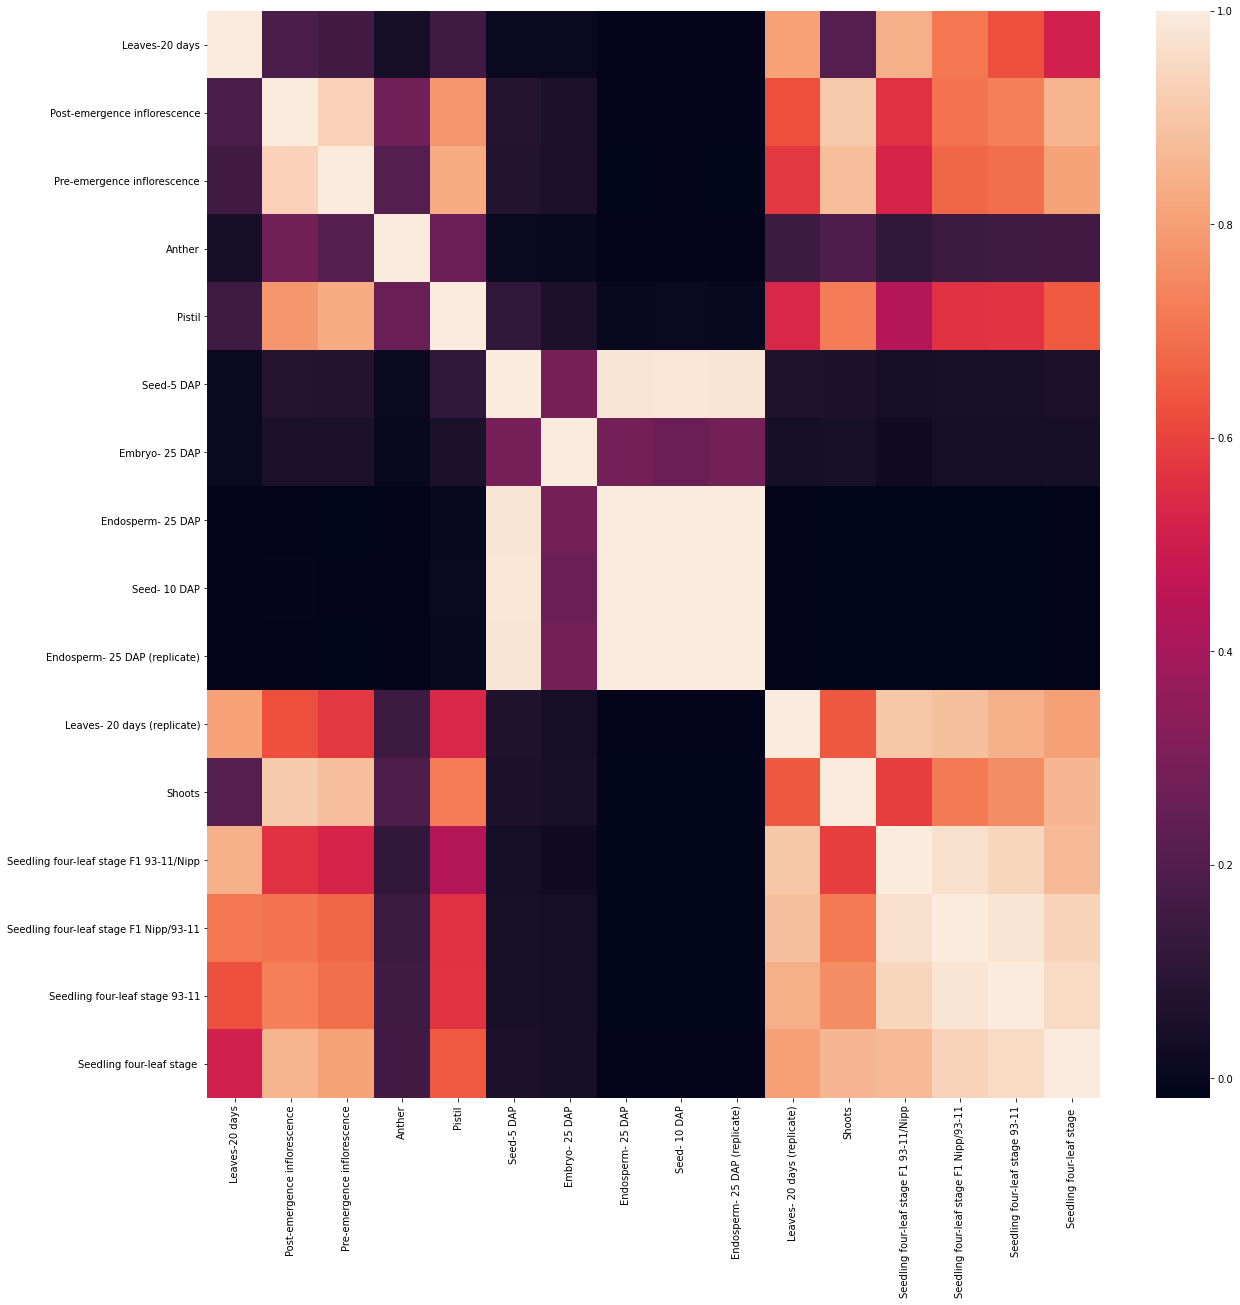

In [149]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df5.iloc[:,:16].corr())

In [1089]:
df4

,QTL,Locus_id,annotation,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,...,M.oryzae infected-Susceptible-24h,M.oryzae infected-Susceptible-96h,Rice leaf-beet armyworm damaged-24h,Rice leaf- Mechanical damaged-24h,Rice leaf-Water weevil damaged-24h,HighMilling-Developing seeds-6days,HighTaste-Developing seeds-6days,LowMilling-Developing seeds-6days,Control-Developing seeds-6days,LowTaste-Developing seeds-6days
0,qCDP1,LOC_Os01g66040,"receptor kinase, putative, expressed",0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.949651,...,0,0,0,0,0,0,0,0,0,0
1,qCDP1,LOC_Os01g66060,expressed protein,0.000000,0.000000e+00,0.000000,0.000000,1.377710,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,qCDP1,LOC_Os01g66050,"wound-responsive family protein, putative, exp...",15.795100,7.500500e+00,16.227000,5.797790,5.667740,6.794850,24.808400,...,0,0,0,0,0,0,0,0,1,0
3,qCDP1,LOC_Os01g66100,"gibberellin 20 oxidase 2, putative, expressed",6.787130,7.936800e-01,2.564160,0.000000,0.000000,1.775430,19.499000,...,0,0,0,0,0,0,0,0,0,0
4,qCDP1,LOC_Os01g66020,"protein kinase family protein, putative, expre...",0.305826,0.000000e+00,0.000000,0.000000,0.000000,0.277186,1.698780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,qCDP12,LOC_Os09g34160,"resistance protein, putative, expressed",0.000000,0.000000e+00,0.384216,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
362,qCDP12,LOC_Os09g34150,"NBS-LRR disease resistance protein, putative, ...",2.092990,0.000000e+00,3.391630,0.000000,0.000000,0.238048,5.446530,...,0,0,0,0,0,0,0,0,0,0
366,qCDP13,LOC_Os10g35180,"white-brown complex homolog protein 11, putati...",0.220067,0.000000e+00,6.198160,0.000000,0.000000,6.523970,55.425400,...,0,0,0,0,0,0,0,0,0,0
367,qCDP13,LOC_Os10g34680,vacuolar protein sorting-associated protein 52...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.270700,0.000000,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

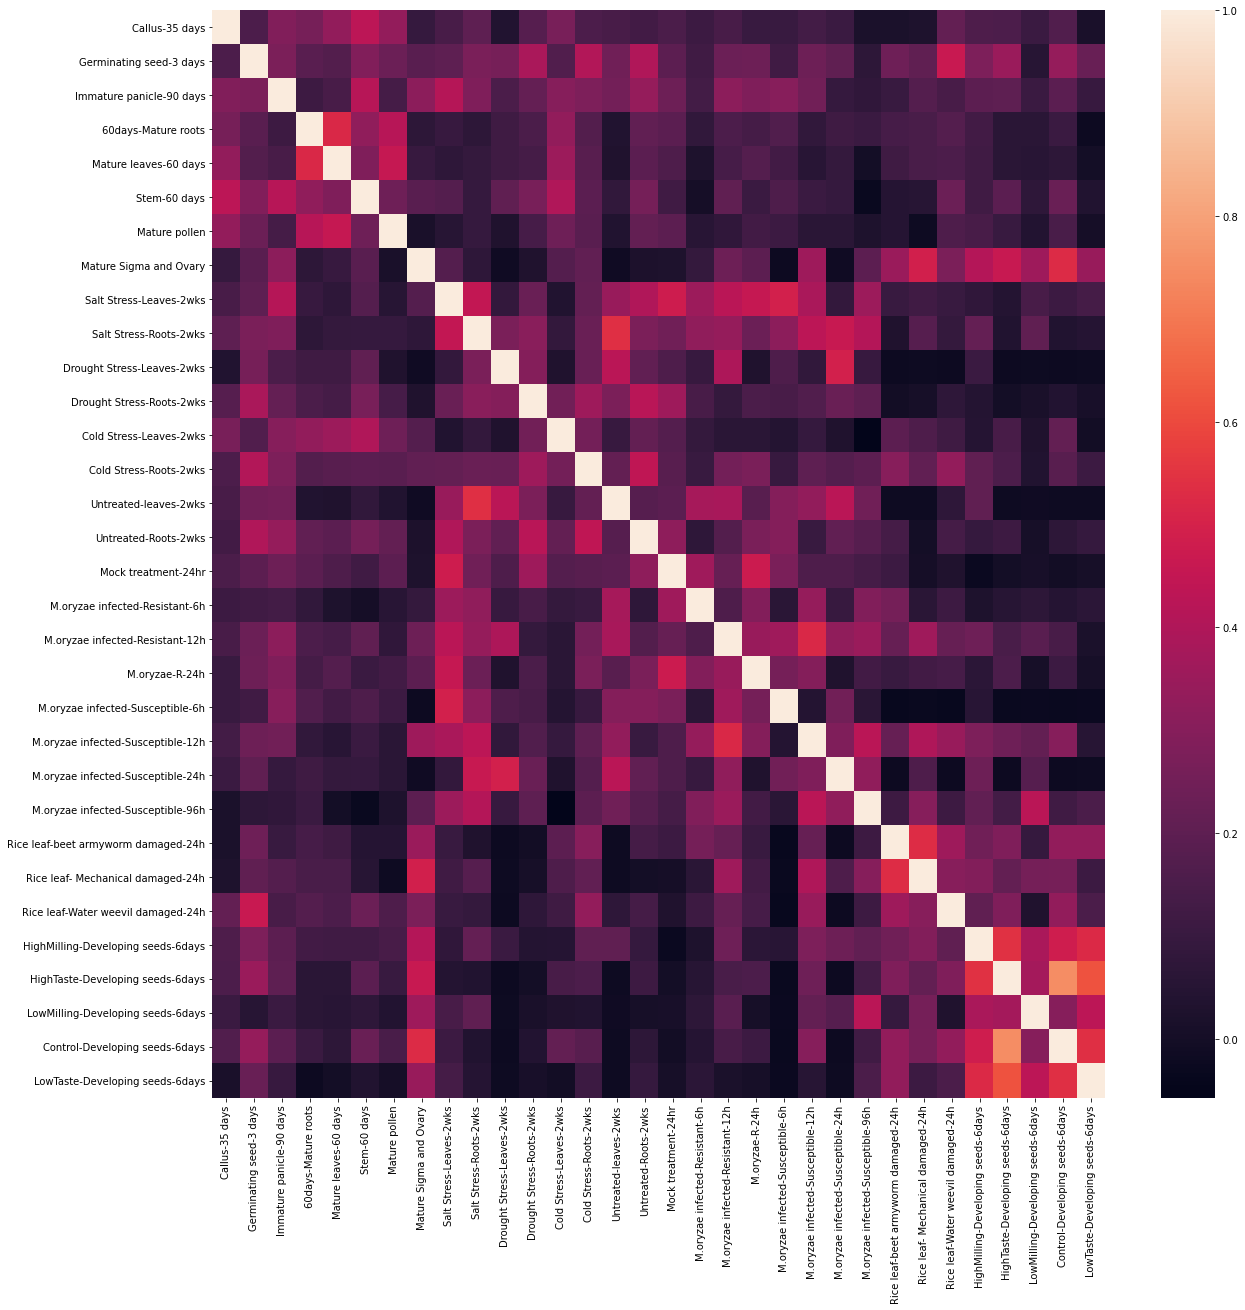

In [148]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df5.iloc[:,16:].corr())

In [933]:
df6 = pd.read_csv('../Figures and tables/Expression Table rqtls added.csv')
df6.index = df6['Locus_id']
(df6.iloc[:,:16] + 1).applymap(np.log2).to_csv('Exp1.csv')
df6.iloc[:,16:].to_csv('Exp2.csv')

In [1112]:
df8 = (df7.iloc[:,:16] + 1).applymap(np.log2).reset_index(drop = True)
t = []
for qt in set(df7.index):
    tdf = df7.loc[qt,:]
    tdf = (tdf.iloc[:, :16] + 1).applymap(np.log2)
    sd = shc.dendrogram(shc.linkage(tdf.values, method='complete'), no_plot=True)
    sd = [int(s) for s in sd['ivl']]
    t = t + [s + len(t) for s in sd]

df8 = df8.loc[t,:]
df8.index = df7.index

In [541]:
#don't run
df8 = (df7.iloc[:,:16] + 1).applymap(np.log2).reset_index(drop = True)
sd = shc.dendrogram(shc.linkage(df8.values, method='complete'), no_plot=True)
sd = [int(s) for s in sd['ivl']]
df8 = df8.loc[sd,:]

In [1114]:
df8.describe()

,Seed-5 DAP,Seed- 10 DAP,Embryo- 25 DAP,Endosperm- 25 DAP,Endosperm- 25 DAP (replicate),Anther,Pistil,Pre-emergence inflorescence,Post-emergence inflorescence,Leaves-20 days,Leaves- 20 days (replicate),Shoots,Seedling four-leaf stage F1 93-11/Nipp,Seedling four-leaf stage F1 Nipp/93-11,Seedling four-leaf stage 93-11,Seedling four-leaf stage
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.572197,1.568687,2.089535,1.380540,1.392923,1.908461,2.678697,2.432934,2.540066,2.009728,2.117436,2.370809,2.113836,2.070541,2.114343,2.161709
std,2.400545,2.170073,2.256193,2.184104,2.181756,1.944391,2.262505,2.238113,2.221988,2.143045,2.094901,2.187908,1.929562,1.998588,1.925587,2.009065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160648,0.000000,0.000000,0.000000,0.191019,0.000000,0.668657,0.467198,0.614163,0.519170
50%,2.220809,0.838702,1.661106,0.416785,0.441958,1.390379,2.622985,2.148956,2.334295,1.435146,1.649846,2.129625,1.506387,1.500014,1.549197,1.625825
75%,4.075185,2.377379,3.463833,2.157235,2.174728,3.302862,4.263634,3.990824,4.141388,3.578018,3.540009,3.924426,3.109855,3.216234,3.094384,3.275184
max,12.495725,13.932584,12.137017,13.820588,13.830426,9.813098,10.436951,9.898701,10.250452,12.520152,12.034204,9.756401,11.622564,11.329404,11.411755,12.185585


In [1118]:
df9 = pd.read_csv('../Figures and tables/Expression Table rqtls added.csv')
df9.index = df9['Locus_id']
df9 = df9.iloc[:,3:]
df9 = (df9.iloc[:,:16] + 1).applymap(np.log2)

In [1111]:
zzd

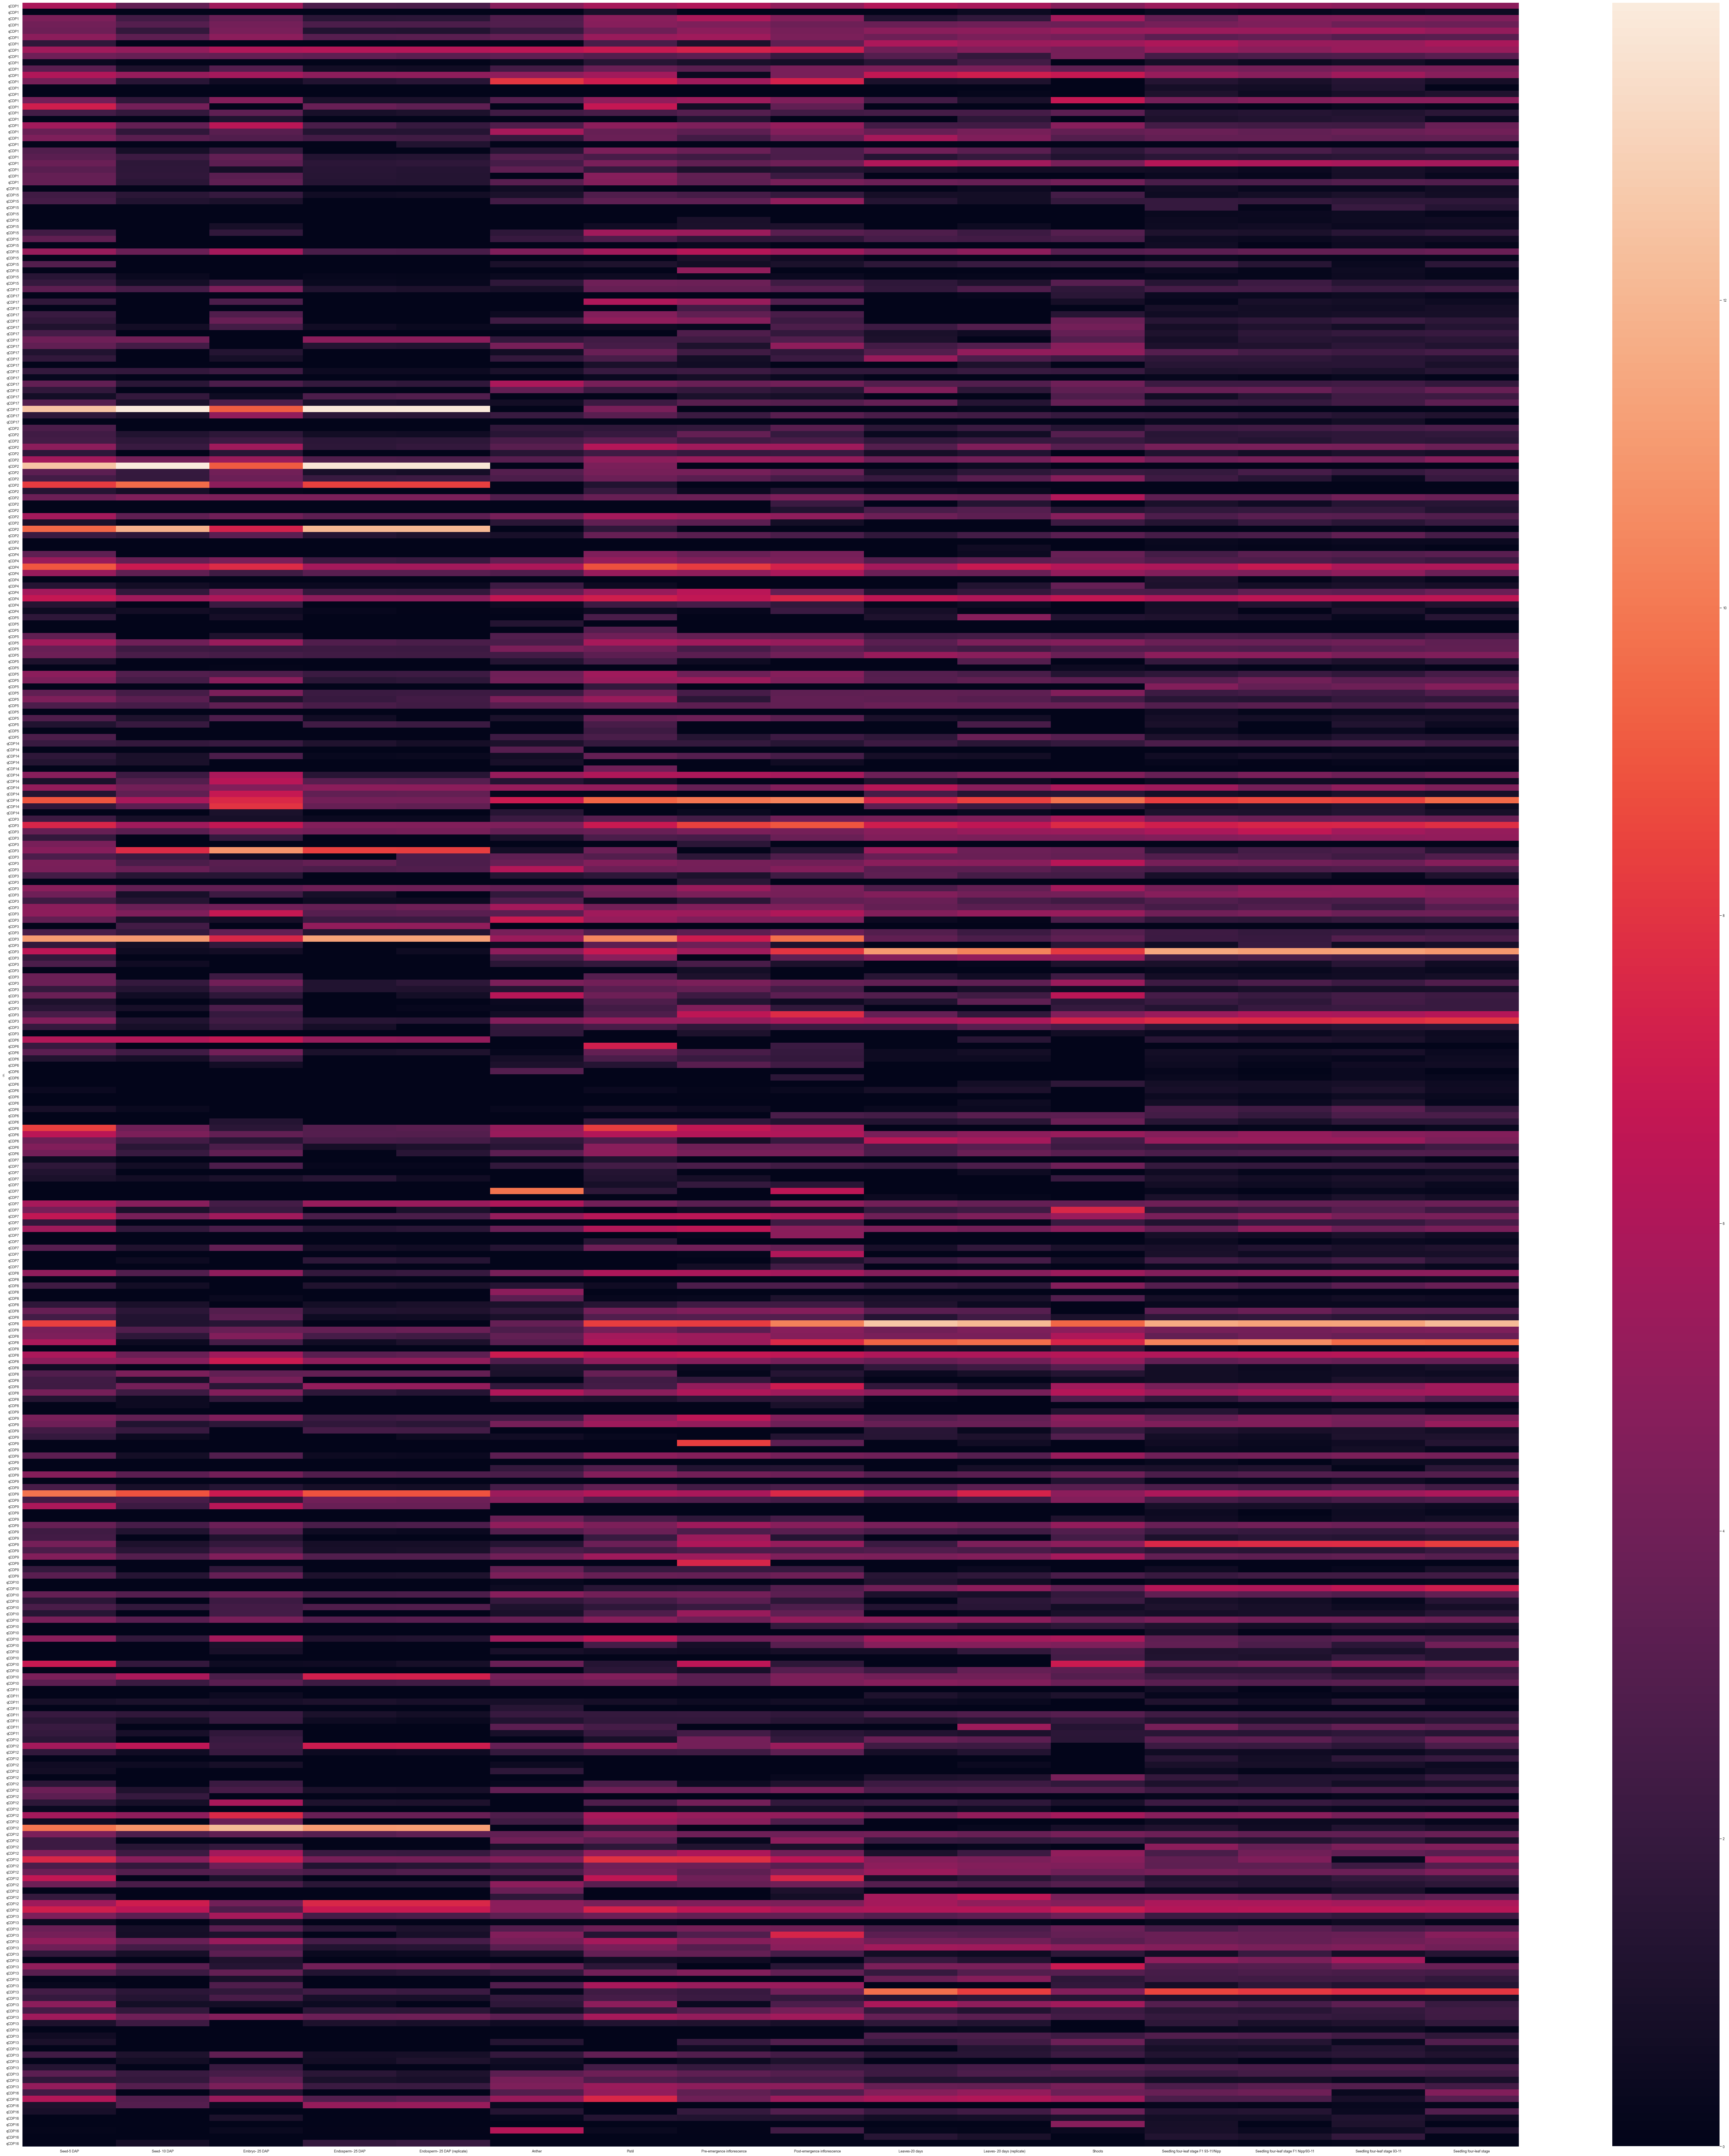

In [1115]:
fig, ax = plt.subplots(figsize=(85,100))
sb.set_context("paper", rc={"font.size":1,"axes.titlesize":8,"axes.labelsize":5})   
sb.heatmap(df8).get_figure().savefig("../Figures and tables/ExpRNAseq3.png")

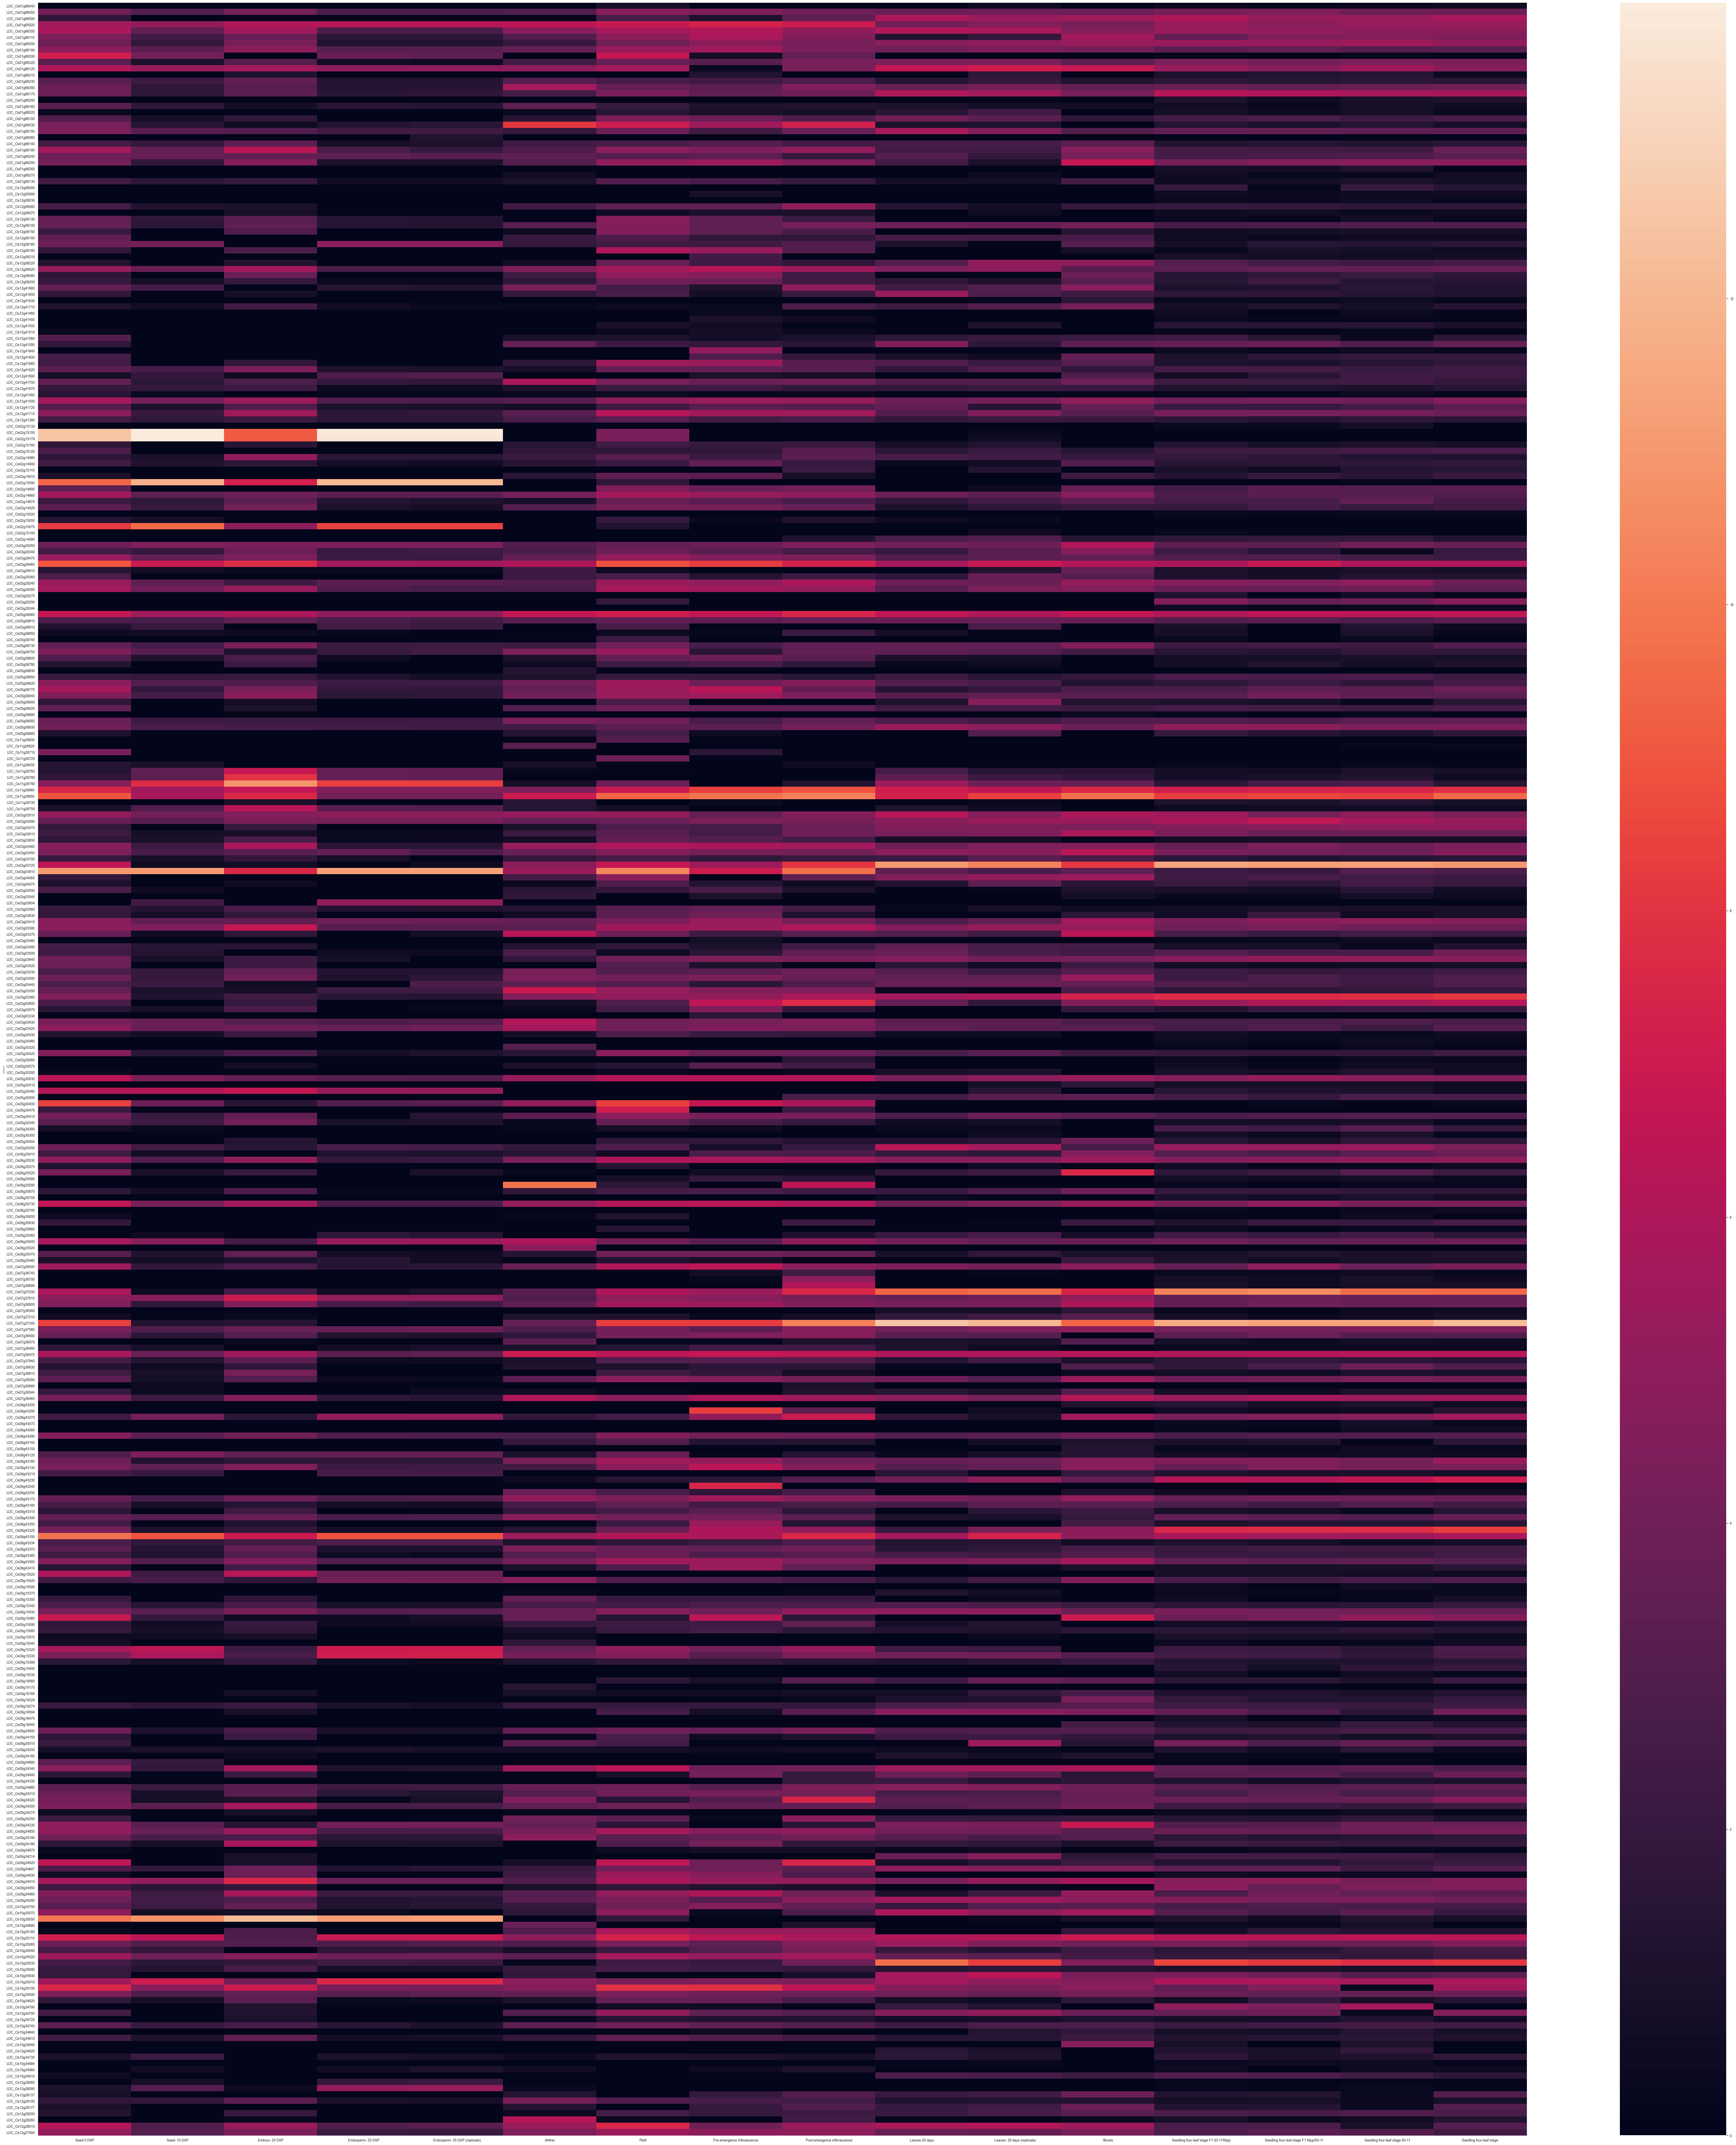

In [1119]:
fig, ax = plt.subplots(figsize=(85,100))
sb.set_context("paper", rc={"font.size":1,"axes.titlesize":8,"axes.labelsize":5})   
sb.heatmap(df9).get_figure().savefig("../Figures and tables/ExpRNAseql2.png")

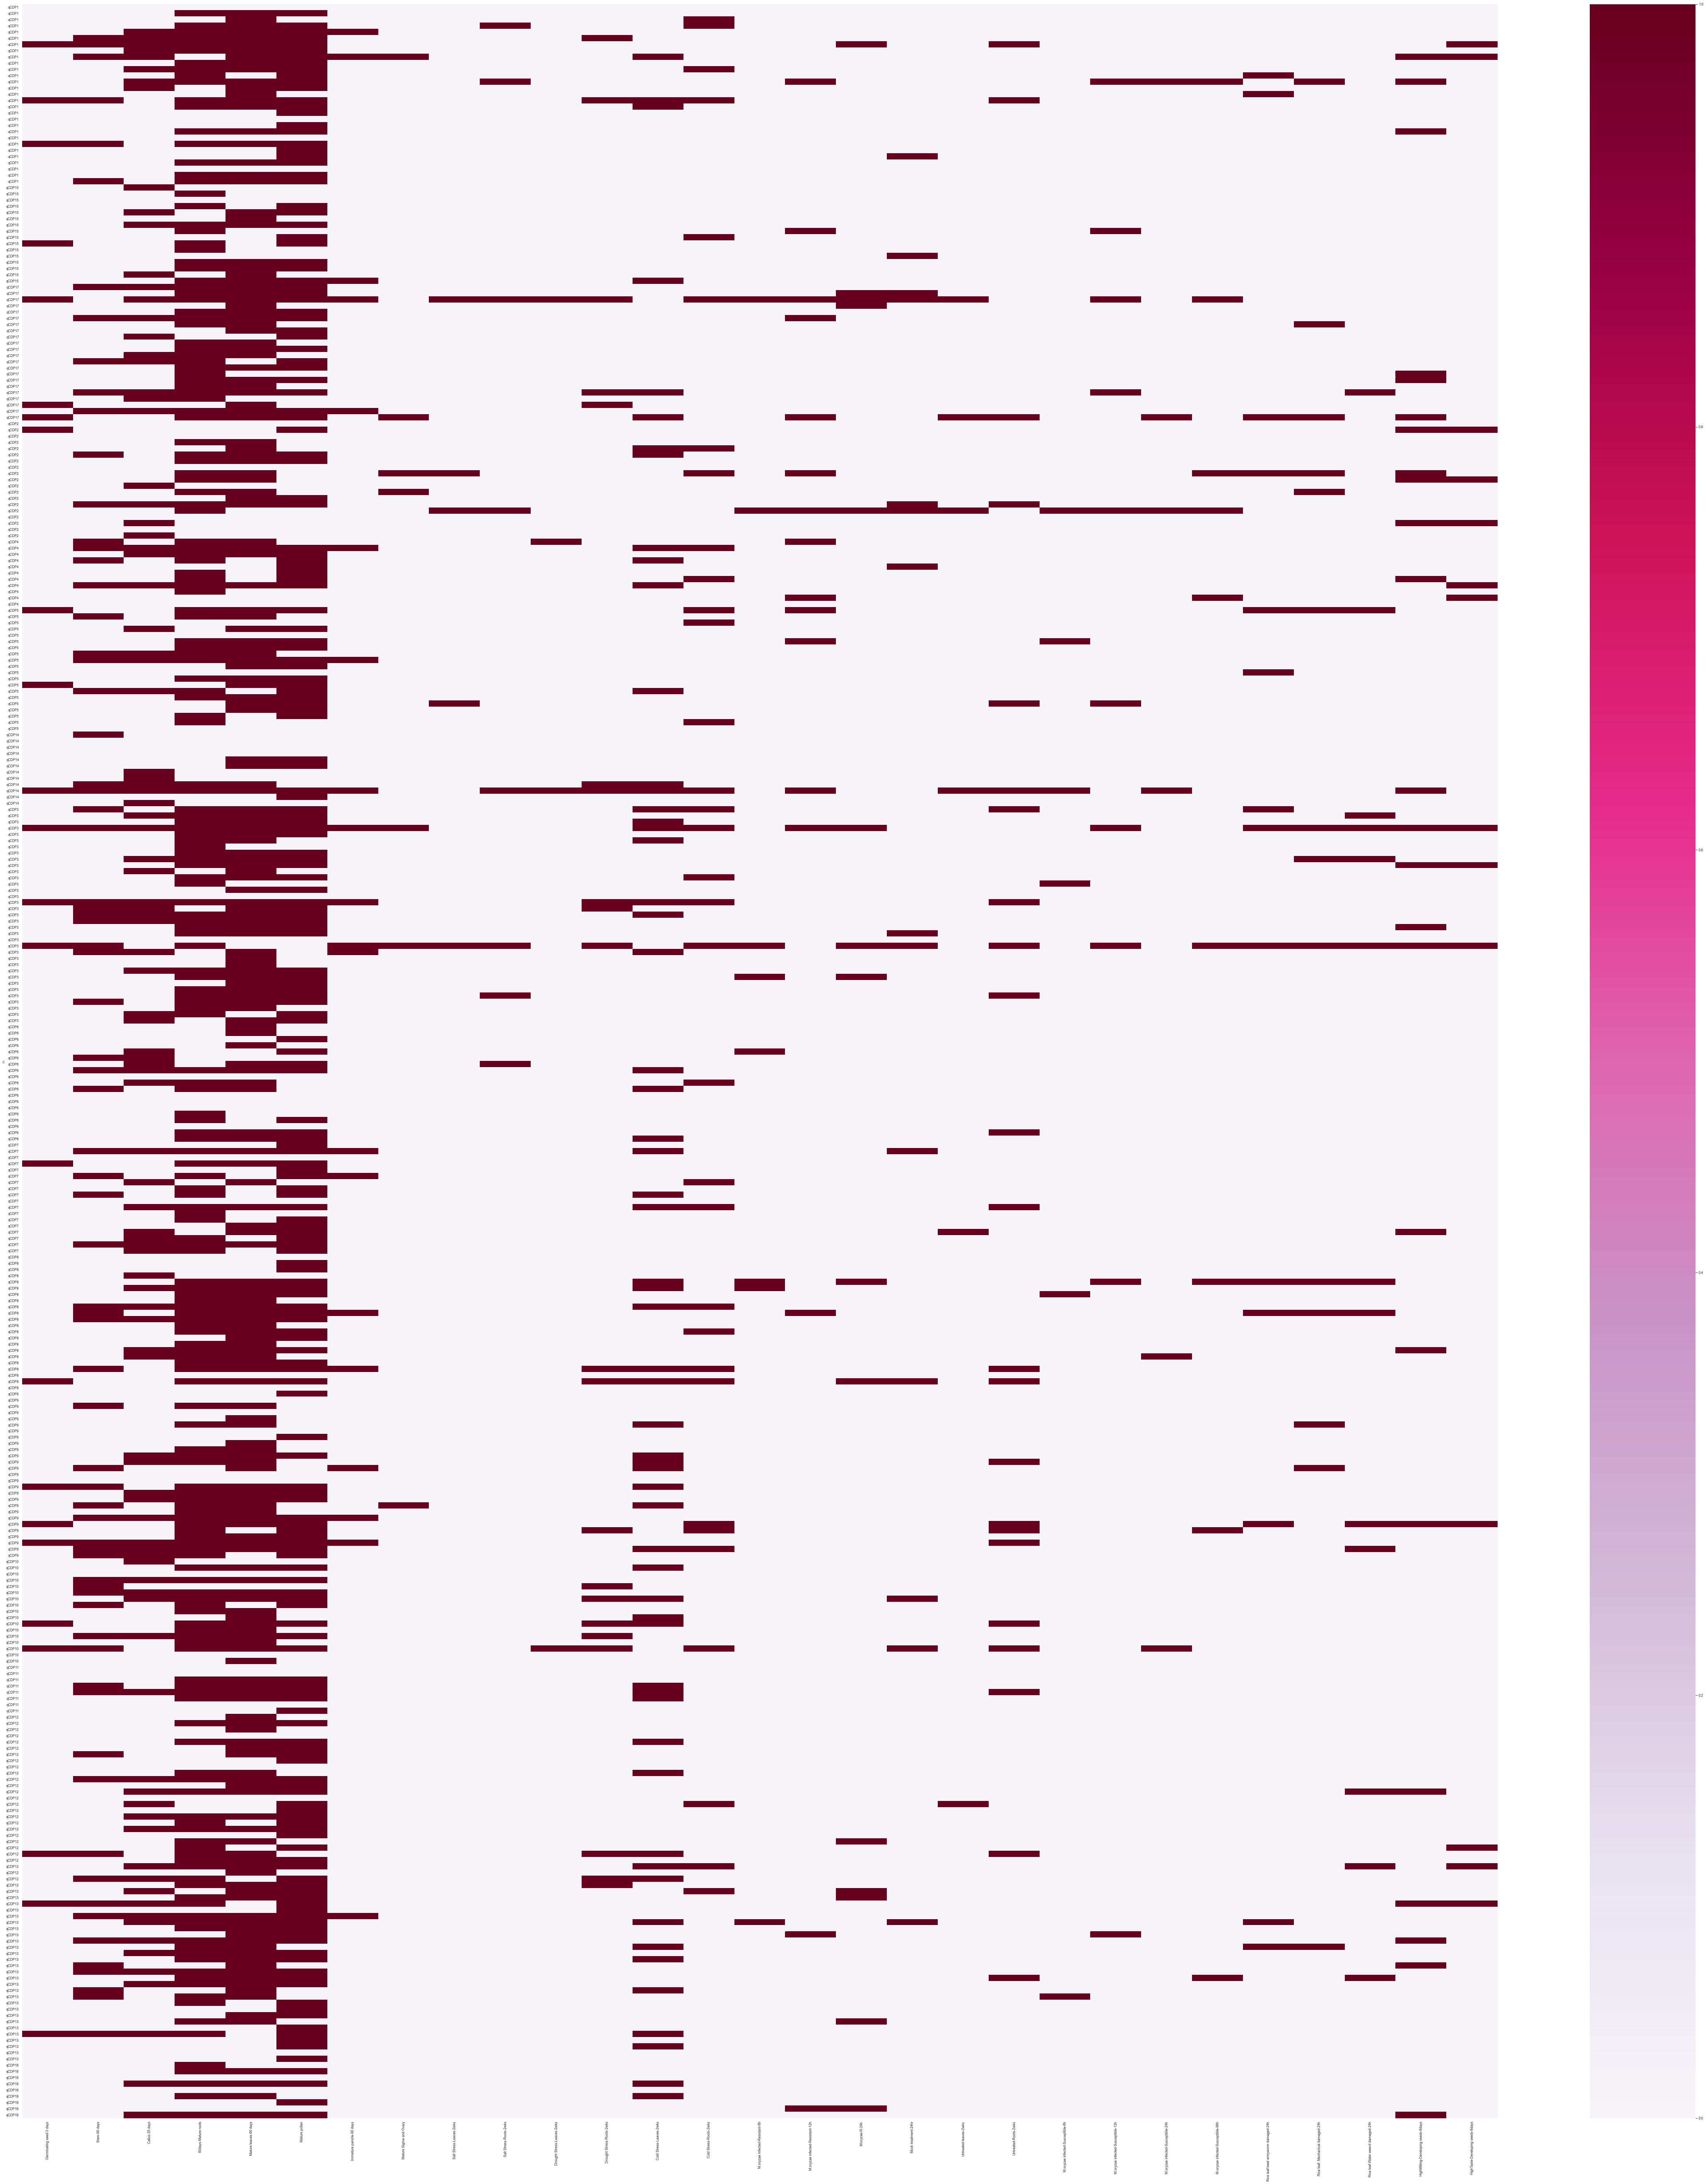

In [1116]:
fig, ax = plt.subplots(figsize=(85,100))
sb.heatmap(df7.iloc[:,16:], cmap = 'PuRd').get_figure().savefig("../Figures and tables/ExpDGE3.png")

In [945]:
df9 = (df9.iloc[:,:16] + 1).applymap(np.log2)

In [677]:
ldf = pd.read_table('../../Data/LD/WF1M20 (1).stat')
ldfi = pd.read_table('../../Data/LD/WF2indR7 (1).stat')
ldfa = pd.read_table('../../Data/LD/WF2ausR7 (1).stat')

In [711]:
#ldf[80000:]
#ldfi[50000:]
#ldfa[110000:]

,#Dist,Mean_r^2,Mean_D',Sum_r^2,Sum_D',NumberPairs
110000,110001,0.4050,NaN,2890.4057,NaN,7137
110001,110002,0.4098,NaN,2932.9722,NaN,7157
110002,110003,0.4018,NaN,2808.6780,NaN,6991
110003,110004,0.3982,NaN,2814.3194,NaN,7068
110004,110005,0.3990,NaN,2887.9897,NaN,7238
...,...,...,...,...,...,...
299995,299996,0.2784,NaN,1763.7611,NaN,6335
299996,299997,0.2756,NaN,1776.0708,NaN,6445
299997,299998,0.2772,NaN,1705.3858,NaN,6152
299998,299999,0.2765,NaN,1774.7962,NaN,6418


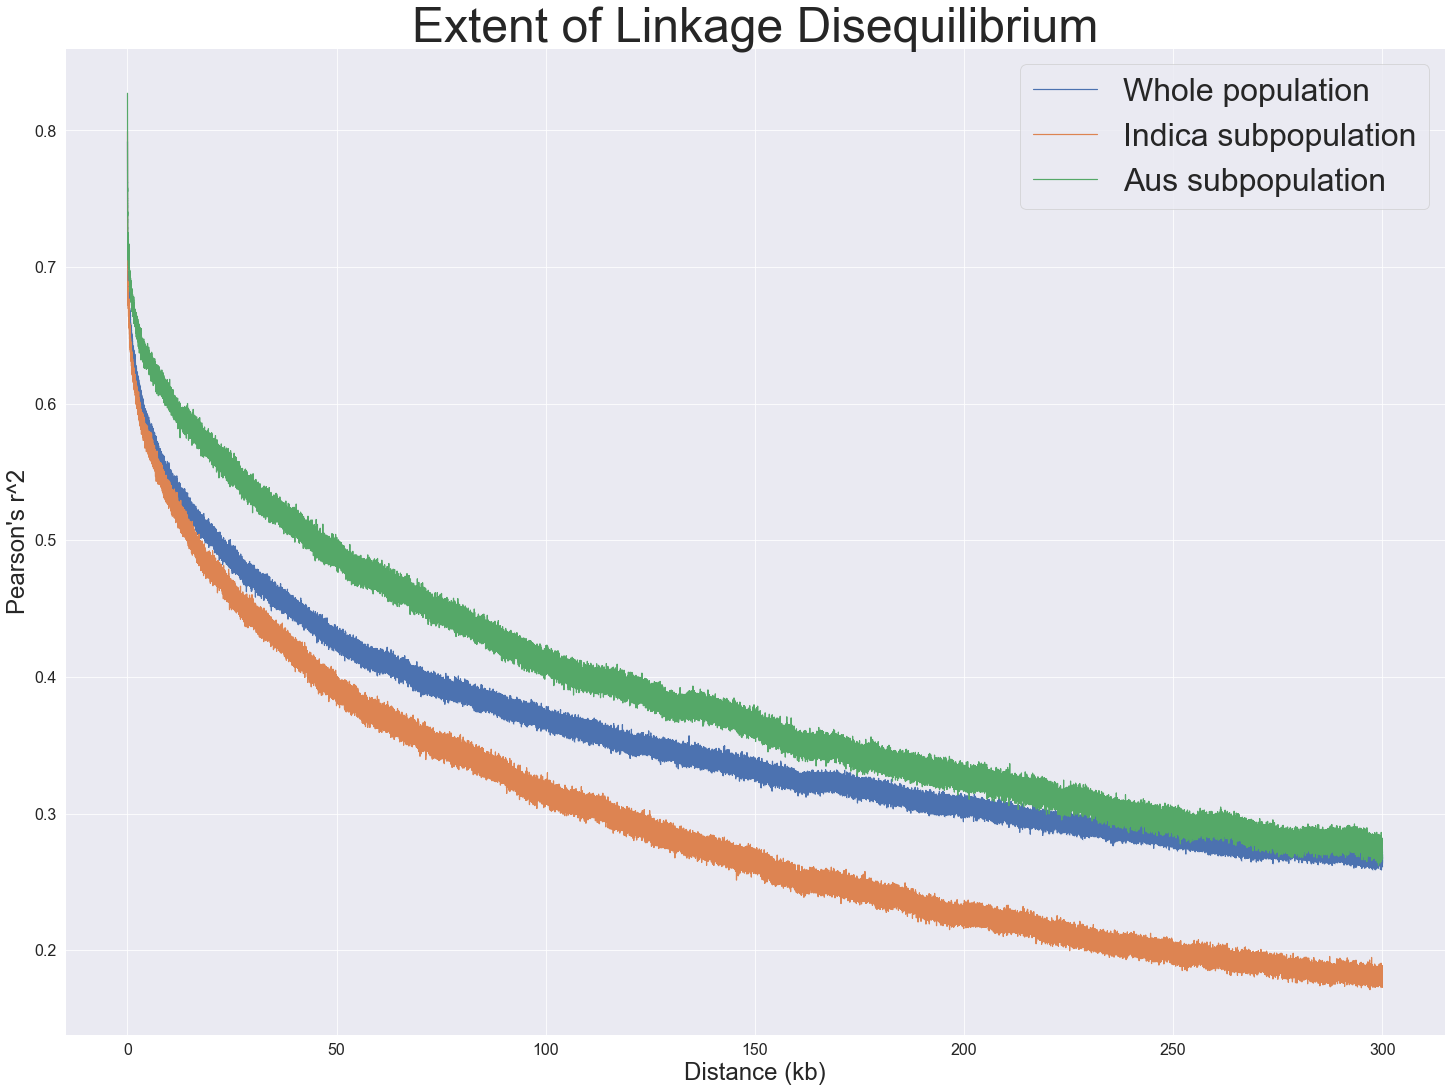

In [689]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(ldf.index/1000, ldf['Mean_r^2'], label = 'Whole population', marker=".", markersize = 0.1)
plt.tight_layout()
plt.plot(ldfi.index/1000, ldfi['Mean_r^2'], label = 'Indica subpopulation', markersize = 0.1)
plt.plot(ldfa.index/1000, ldfa['Mean_r^2'],  label = 'Aus subpopulation', markersize = 0.1)
plt.xlabel('Distance (kb)', fontsize = 24)
plt.ylabel('Pearson\'s r^2', fontsize = 24)
plt.title('Extent of Linkage Disequilibrium', fontsize = 48)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 32)
plt.tight_layout()
plt.savefig('../Figures and tables/LD.png')